In [1]:
.libPaths(c("~/Cellchat_Rlibs", .libPaths()))

In [ ]:
library(CellChat)
library(Seurat)
library(NMF)
library(ggalluvial)
library(qs)

In [3]:
seurat_obj <- qread("../Step5_Clustering/out/SCPCP000001/annotated_harmony_SCPCP000001_50_2000_3000.qs")
seurat_obj <- SetIdent(seurat_obj, value="cell_label")

In [4]:
cell_order=c("T cells",
            "NK cells",
            "Naive B",
            "MGD TAM",
            "MGD Macrophage",
            "MD Macrophage",
            "Undetermined",
            "MES-APC-like",
            "MES-AC-like",
            "MES-AC-like Cycling",
            "OPC-like"
)

seurat_obj$cell_label <- factor(seurat_obj$cell_label, levels = cell_order)
seurat_obj <- SetIdent(seurat_obj, value = "cell_label")


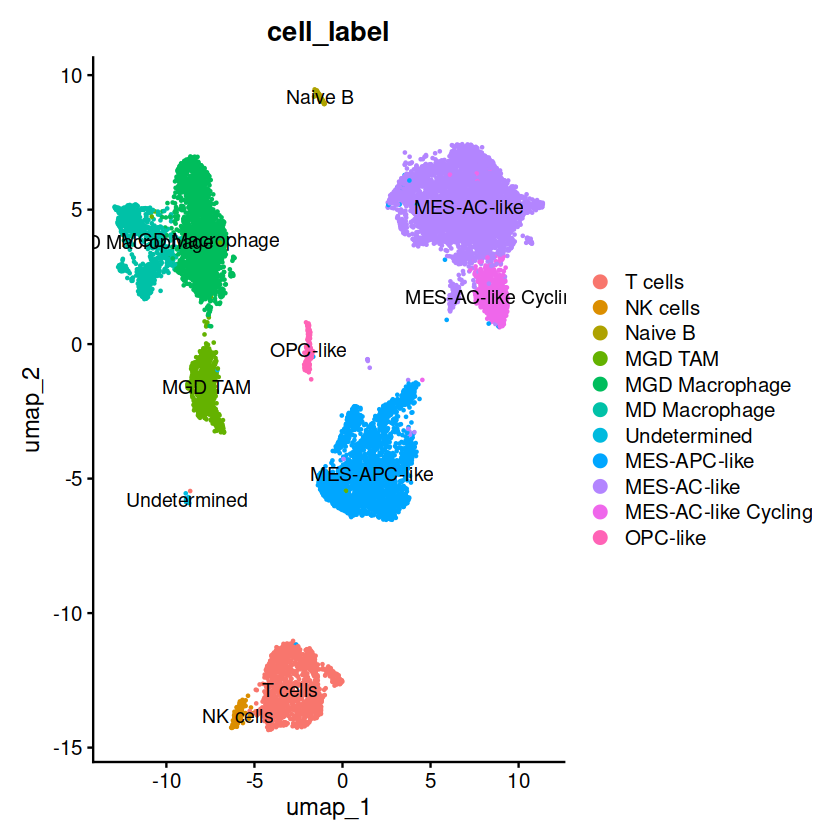

In [5]:
DimPlot(seurat_obj, group.by="cell_label", label=TRUE)

In [6]:
head(seurat_obj@meta.data)

orig.ident  nCount_RNA nFeature_RNA
SCPCL000002_AGAAATGGTGTACGCC SCPCL000002 33833      4494        
SCPCL000002_TGATGCAAGGTTATAG SCPCL000002 22797      4915        
SCPCL000002_ATTCACTGTCGTATTG SCPCL000002 26185      4870        
SCPCL000002_TGATTCTTCAAAGGTA SCPCL000002 25374      4576        
SCPCL000002_TGCTTCGTCGTTGCCT SCPCL000002 24474      4615        
SCPCL000002_TGGGAAGAGAAATGGG SCPCL000002 23535      4143        
                             nCount_originalexp nFeature_originalexp
SCPCL000002_AGAAATGGTGTACGCC 35369              4750                
SCPCL000002_TGATGCAAGGTTATAG 24244              5365                
SCPCL000002_ATTCACTGTCGTATTG 27623              5205                
SCPCL000002_TGATTCTTCAAAGGTA 26932              4947                
SCPCL000002_TGCTTCGTCGTTGCCT 25791              4914                
SCPCL000002_TGGGAAGAGAAATGGG 24454              4374                
                             barcodes         sum   detected subsets_mito_sum
SCPCL000002_AGAAATGGTGTACGCC AGAAATGGTGTACGCC 35369 4750     1066            
SCPCL000002_TGATGCAAGGTTATAG TGATGCAAGGTTATAG 24244 5365     2195            
SCPCL000002_ATTCACTGTCGTATTG ATTCACTGTCGTATTG 27623 5205     1971            
SCPCL000002_TGATTCTTCAAAGGTA TGATTCTTCAAAGGTA 26932 4947     1854            
SCPCL000002_TGCTTCGTCGTTGCCT TGCTTCGTCGTTGCCT 25791 4914     4734            
SCPCL000002_TGGGAAGAGAAATGGG TGGGAAGAGAAATGGG 24454 4374     1457            
                             subsets_mito_detected ⋯ old.ident CC.Difference
SCPCL000002_AGAAATGGTGTACGCC 13                    ⋯ 5         -0.01085282  
SCPCL000002_TGATGCAAGGTTATAG 15                    ⋯ 12         0.05526925  
SCPCL000002_ATTCACTGTCGTATTG 14                    ⋯ 5         -0.03152882  
SCPCL000002_TGATTCTTCAAAGGTA 14                    ⋯ 1         -0.01083856  
SCPCL000002_TGCTTCGTCGTTGCCT 14                    ⋯ 1          0.05112315  
SCPCL000002_TGGGAAGAGAAATGGG 13                    ⋯ 5         -0.01662598  
                             filename    RNA_snn_res.0.05 RNA_snn_res.0.1
SCPCL000002_AGAAATGGTGTACGCC SCPCL000002 1                1              
SCPCL000002_TGATGCAAGGTTATAG SCPCL000002 3                3              
SCPCL000002_ATTCACTGTCGTATTG SCPCL000002 1                1              
SCPCL000002_TGATTCTTCAAAGGTA SCPCL000002 1                1              
SCPCL000002_TGCTTCGTCGTTGCCT SCPCL000002 1                1              
SCPCL000002_TGGGAAGAGAAATGGG SCPCL000002 1                1              
                             RNA_snn_res.0.2 RNA_snn_res.0.3 RNA_snn_res.0.4
SCPCL000002_AGAAATGGTGTACGCC 4               4               5              
SCPCL000002_TGATGCAAGGTTATAG 9               9               11             
SCPCL000002_ATTCACTGTCGTATTG 4               4               5              
SCPCL000002_TGATTCTTCAAAGGTA 2               2               2              
SCPCL000002_TGCTTCGTCGTTGCCT 2               2               2              
SCPCL000002_TGGGAAGAGAAATGGG 4               4               5              
                             RNA_snn_res.0.45 cell_label    
SCPCL000002_AGAAATGGTGTACGCC 5                MD Macrophage 
SCPCL000002_TGATGCAAGGTTATAG 13               NK cells      
SCPCL000002_ATTCACTGTCGTATTG 5                MD Macrophage 
SCPCL000002_TGATTCTTCAAAGGTA 1                MGD Macrophage
SCPCL000002_TGCTTCGTCGTTGCCT 1                MGD Macrophage
SCPCL000002_TGGGAAGAGAAATGGG 5                MD Macrophage

In [7]:
table(seurat_obj@meta.data$diagnosis)


     Glioblastoma High-grade glioma 
            13663              1061 

In [8]:
seurat_obj = SetIdent(seurat_obj, value="cell_label")
seurat_obj@meta.data$label <- as.factor(seurat_obj@meta.data$cell_label)
keep_cells <- !is.na(seurat_obj@meta.data$cell_label)
seurat_obj <- subset(seurat_obj, cells = colnames(seurat_obj)[keep_cells])
meta <- seurat_obj@meta.data
meta$samples <- meta$label
meta$samples <- droplevels(as.factor(meta$samples))
cellchat <- createCellChat(object = seurat_obj, meta = meta, group.by = "samples")
unique(cellchat@idents)

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  T cells, NK cells, Naive B, MGD TAM, MGD Macrophage, MD Macrophage, Undetermined, MES-APC-like, MES-AC-like, MES-AC-like Cycling, OPC-like 


[1] MD Macrophage       NK cells            MGD Macrophage     
 [4] MES-AC-like         T cells             OPC-like           
 [7] MES-AC-like Cycling MES-APC-like        MGD TAM            
[10] Naive B             Undetermined       
11 Levels: T cells NK cells Naive B MGD TAM MGD Macrophage ... OPC-like

In [9]:
cellchat <- addMeta(cellchat, meta = meta)
cellchat <- setIdent(cellchat, ident.use = "label") 
groupSize <- as.numeric(table(cellchat@idents)) 

The number of highly variable ligand-receptor pairs used for signaling inference is 881 


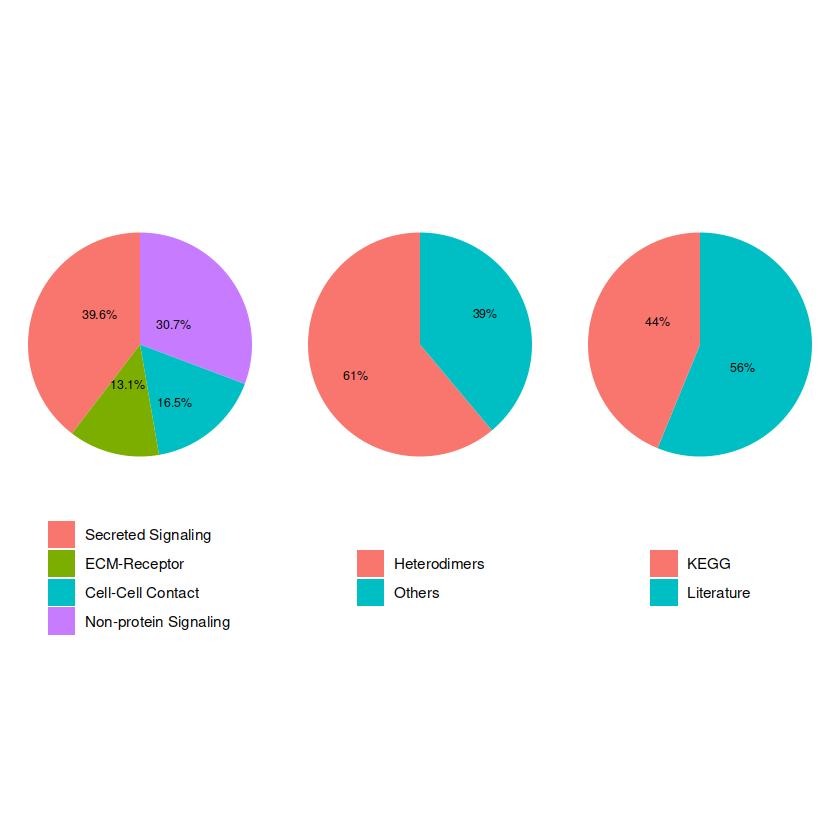

In [10]:
CellChatDB <- CellChatDB.human 
showDatabaseCategory(CellChatDB)
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat) 
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

In [11]:
unique(cellchat@idents)

[1] MD Macrophage       NK cells            MGD Macrophage     
 [4] MES-AC-like         T cells             OPC-like           
 [7] MES-AC-like Cycling MES-APC-like        MGD TAM            
[10] Naive B             Undetermined       
11 Levels: T cells NK cells Naive B MGD TAM MGD Macrophage ... OPC-like

In [ ]:
cellchat <- computeCommunProb(cellchat)
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
df.net <- subsetCommunication(cellchat)
slot.name = "netP"
df.net <- subsetCommunication(cellchat, sources.use = c(0,7), targets.use = c(16))
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
mat <- cellchat@net$weight

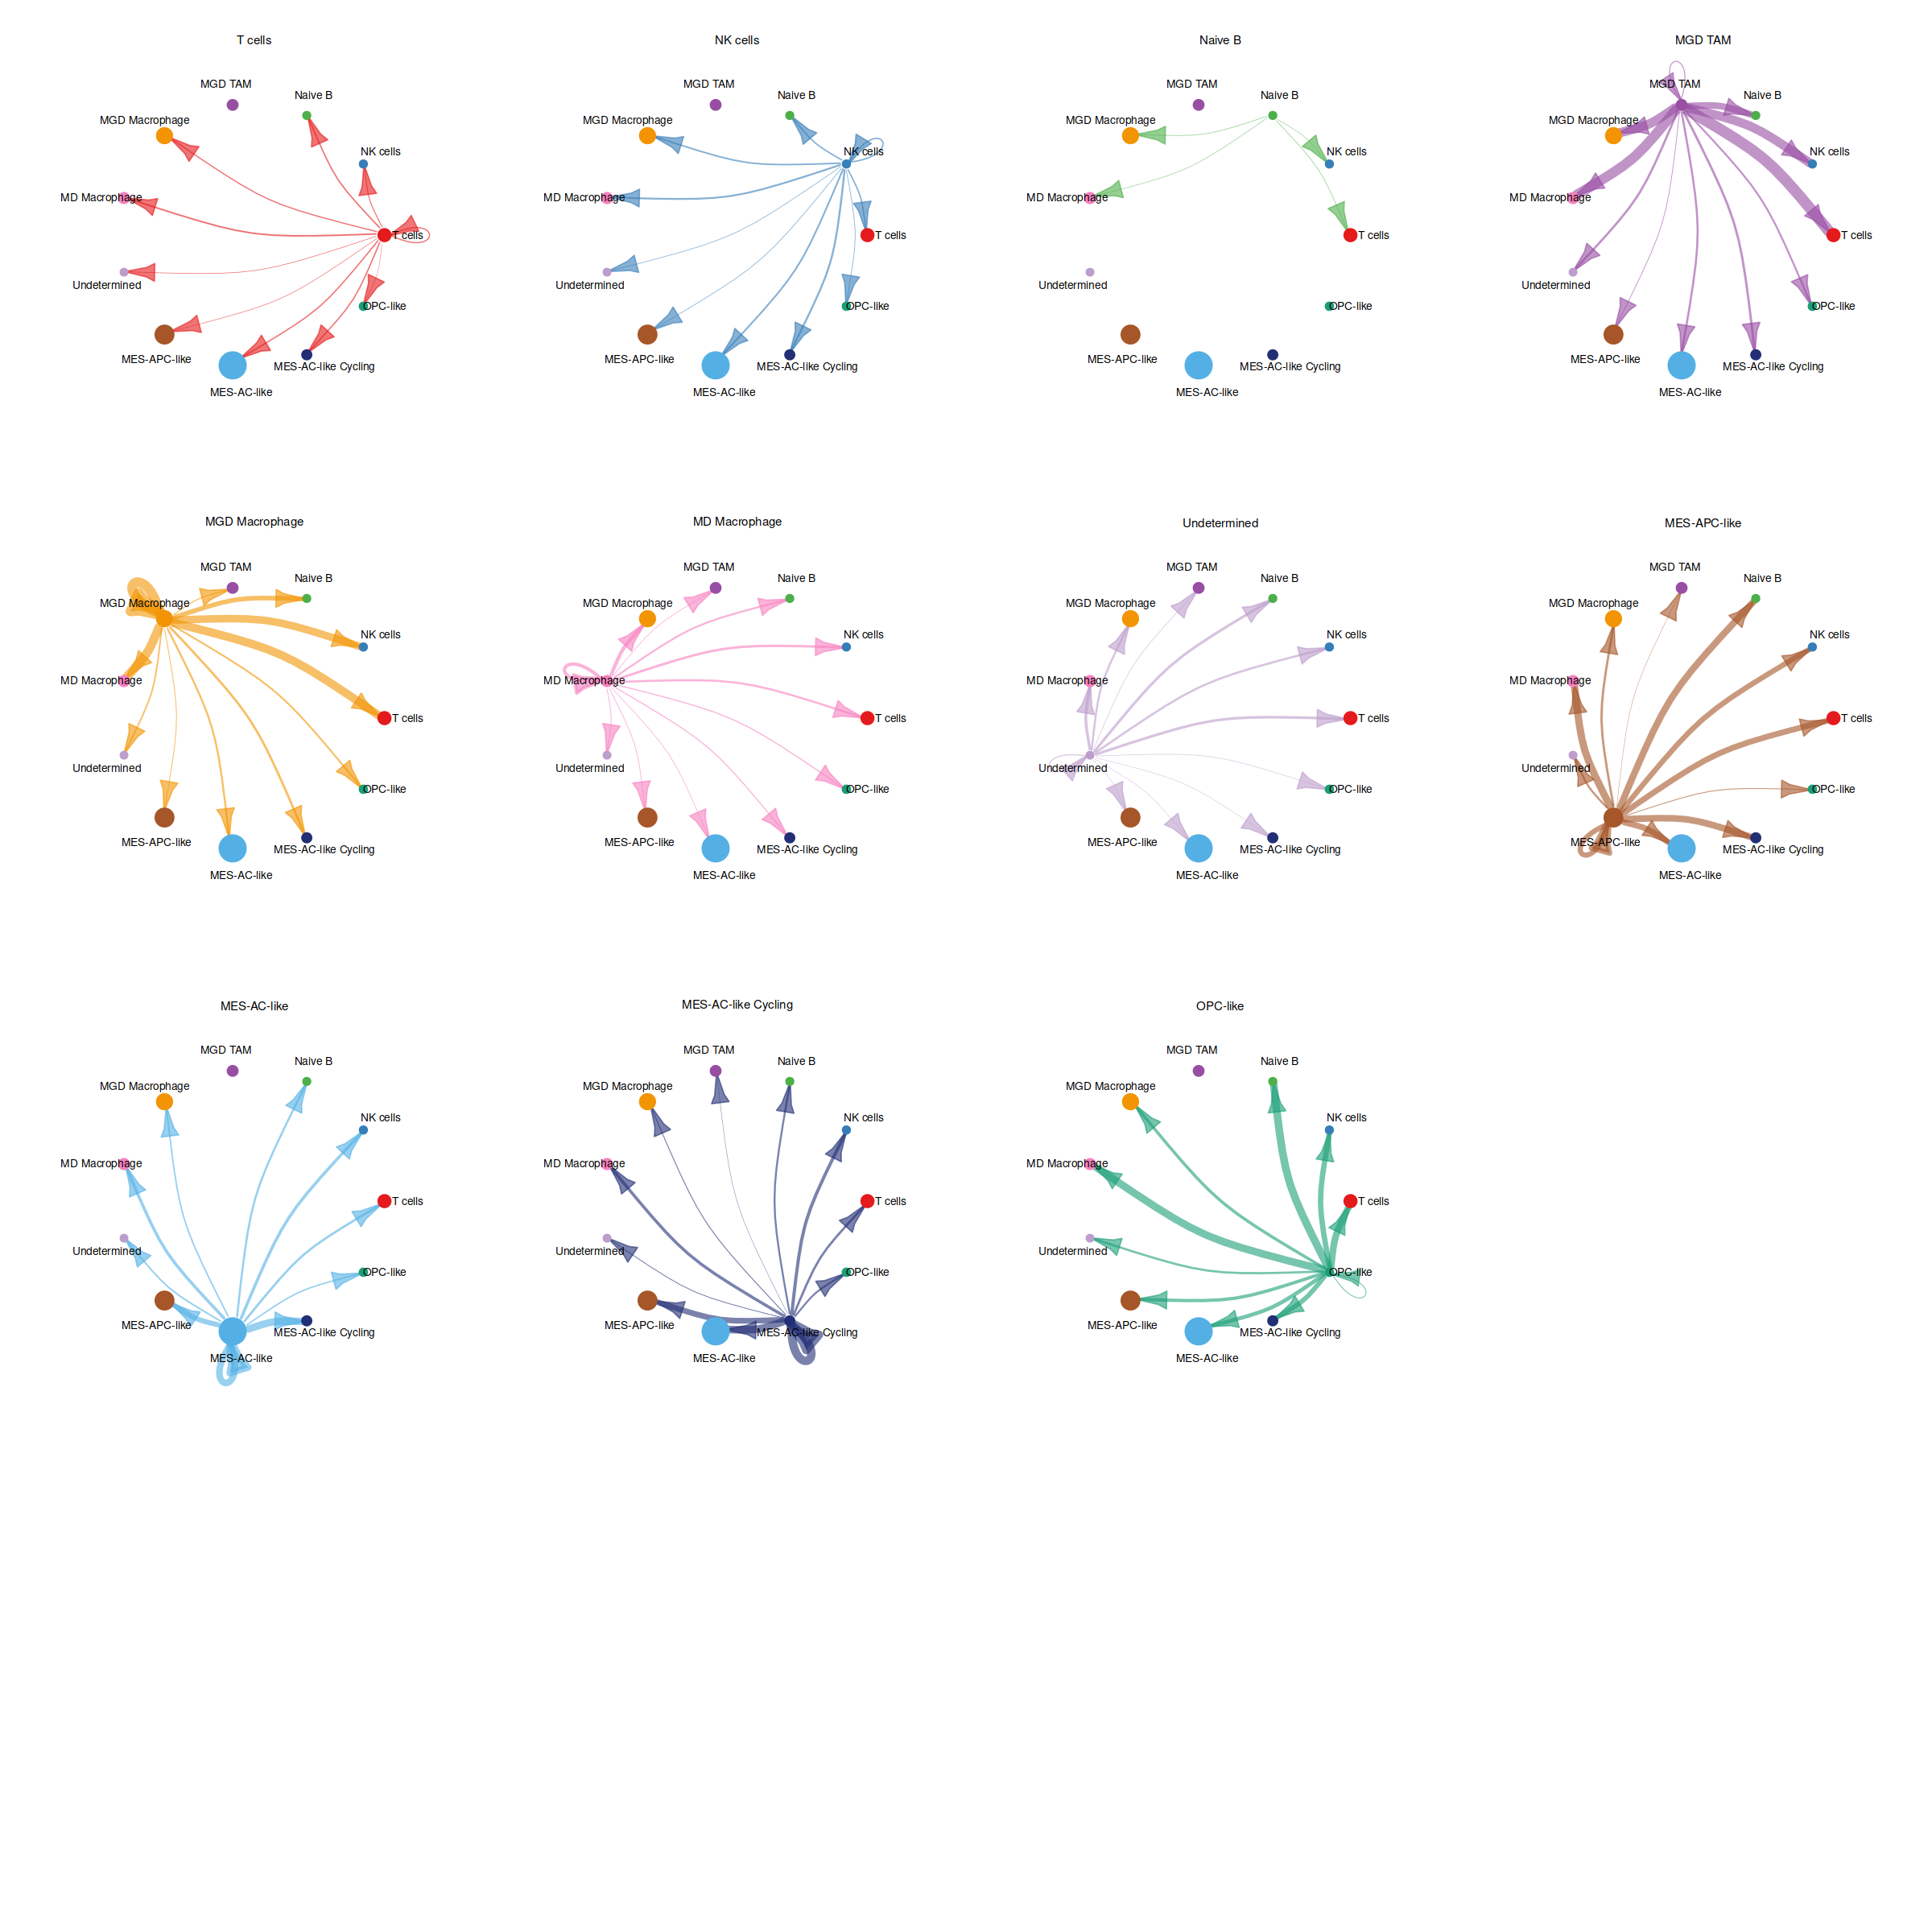

In [14]:
par(mfrow = c(4,4), xpd=TRUE)

circle_plot_list <- list()
for (i in 1:nrow(mat)) {
    mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
    mat2[i, ] <- mat[i, ]
    p <- netVisual_circle(mat2, 
                     vertex.weight = groupSize, 
                     weight.scale = T, 
                     edge.weight.max = max(mat), 
                     title.name = rownames(mat)[i])
    circle_plot_list[[rownames(mat)[[i]]]] <- p
    p
}

 

In [15]:
p <- circle_plot_list[['BMD Polarized TAM']]
p

NULL

In [16]:
head(cellchat@meta)

orig.ident  nCount_RNA nFeature_RNA
SCPCL000002_AGAAATGGTGTACGCC SCPCL000002 33833      4494        
SCPCL000002_TGATGCAAGGTTATAG SCPCL000002 22797      4915        
SCPCL000002_ATTCACTGTCGTATTG SCPCL000002 26185      4870        
SCPCL000002_TGATTCTTCAAAGGTA SCPCL000002 25374      4576        
SCPCL000002_TGCTTCGTCGTTGCCT SCPCL000002 24474      4615        
SCPCL000002_TGGGAAGAGAAATGGG SCPCL000002 23535      4143        
                             nCount_originalexp nFeature_originalexp
SCPCL000002_AGAAATGGTGTACGCC 35369              4750                
SCPCL000002_TGATGCAAGGTTATAG 24244              5365                
SCPCL000002_ATTCACTGTCGTATTG 27623              5205                
SCPCL000002_TGATTCTTCAAAGGTA 26932              4947                
SCPCL000002_TGCTTCGTCGTTGCCT 25791              4914                
SCPCL000002_TGGGAAGAGAAATGGG 24454              4374                
                             barcodes         sum   detected subsets_mito_sum
SCPCL000002_AGAAATGGTGTACGCC AGAAATGGTGTACGCC 35369 4750     1066            
SCPCL000002_TGATGCAAGGTTATAG TGATGCAAGGTTATAG 24244 5365     2195            
SCPCL000002_ATTCACTGTCGTATTG ATTCACTGTCGTATTG 27623 5205     1971            
SCPCL000002_TGATTCTTCAAAGGTA TGATTCTTCAAAGGTA 26932 4947     1854            
SCPCL000002_TGCTTCGTCGTTGCCT TGCTTCGTCGTTGCCT 25791 4914     4734            
SCPCL000002_TGGGAAGAGAAATGGG TGGGAAGAGAAATGGG 24454 4374     1457            
                             subsets_mito_detected ⋯ filename   
SCPCL000002_AGAAATGGTGTACGCC 13                    ⋯ SCPCL000002
SCPCL000002_TGATGCAAGGTTATAG 15                    ⋯ SCPCL000002
SCPCL000002_ATTCACTGTCGTATTG 14                    ⋯ SCPCL000002
SCPCL000002_TGATTCTTCAAAGGTA 14                    ⋯ SCPCL000002
SCPCL000002_TGCTTCGTCGTTGCCT 14                    ⋯ SCPCL000002
SCPCL000002_TGGGAAGAGAAATGGG 13                    ⋯ SCPCL000002
                             RNA_snn_res.0.05 RNA_snn_res.0.1 RNA_snn_res.0.2
SCPCL000002_AGAAATGGTGTACGCC 1                1               4              
SCPCL000002_TGATGCAAGGTTATAG 3                3               9              
SCPCL000002_ATTCACTGTCGTATTG 1                1               4              
SCPCL000002_TGATTCTTCAAAGGTA 1                1               2              
SCPCL000002_TGCTTCGTCGTTGCCT 1                1               2              
SCPCL000002_TGGGAAGAGAAATGGG 1                1               4              
                             RNA_snn_res.0.3 RNA_snn_res.0.4 RNA_snn_res.0.45
SCPCL000002_AGAAATGGTGTACGCC 4               5               5               
SCPCL000002_TGATGCAAGGTTATAG 9               11              13              
SCPCL000002_ATTCACTGTCGTATTG 4               5               5               
SCPCL000002_TGATTCTTCAAAGGTA 2               2               1               
SCPCL000002_TGCTTCGTCGTTGCCT 2               2               1               
SCPCL000002_TGGGAAGAGAAATGGG 4               5               5               
                             cell_label     label          samples       
SCPCL000002_AGAAATGGTGTACGCC MD Macrophage  MD Macrophage  MD Macrophage 
SCPCL000002_TGATGCAAGGTTATAG NK cells       NK cells       NK cells      
SCPCL000002_ATTCACTGTCGTATTG MD Macrophage  MD Macrophage  MD Macrophage 
SCPCL000002_TGATTCTTCAAAGGTA MGD Macrophage MGD Macrophage MGD Macrophage
SCPCL000002_TGCTTCGTCGTTGCCT MGD Macrophage MGD Macrophage MGD Macrophage
SCPCL000002_TGGGAAGAGAAATGGG MD Macrophage  MD Macrophage  MD Macrophage

In [17]:
pathway_list <- cellchat@netP$pathways
pathway_list

[1] "MIF"        "PTN"        "SPP1"       "COMPLEMENT" "GALECTIN"  
 [6] "CypA"       "MK"         "PARs"       "TGFb"       "PDGF"      
[11] "ANNEXIN"    "NRG"        "GRN"        "PTPR"       "PSAP"      
[16] "BMP"        "TRAIL"      "VISFATIN"   "GAS"        "SLIT"      
[21] "BAFF"       "EGF"        "ANGPTL"     "IL16"       "TNF"       
[26] "WNT"        "ncWNT"

In [18]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

In [19]:
options(repr.plot.width=10, repr.plot.height=10)

png("./out/outgoing.png", width = 16, height = 13, units = "in", res = 600)
netAnalysis_signalingRole_heatmap(cellchat,
                                width=12,
                                height=15,
                                font.size=16,
                                font.size.title=24,
                                pattern="outgoing"
)
dev.off()



pdf 
  2

In [20]:
options(repr.plot.width=10, repr.plot.height=10)

png("./out/incoming.png", width = 16, height = 13, units = "in", res = 600)
netAnalysis_signalingRole_heatmap(cellchat,
                                width=12,
                                height=15,
                                font.size=16,
                                font.size.title=24,
                                pattern="incoming"

)

dev.off()

pdf 
  2

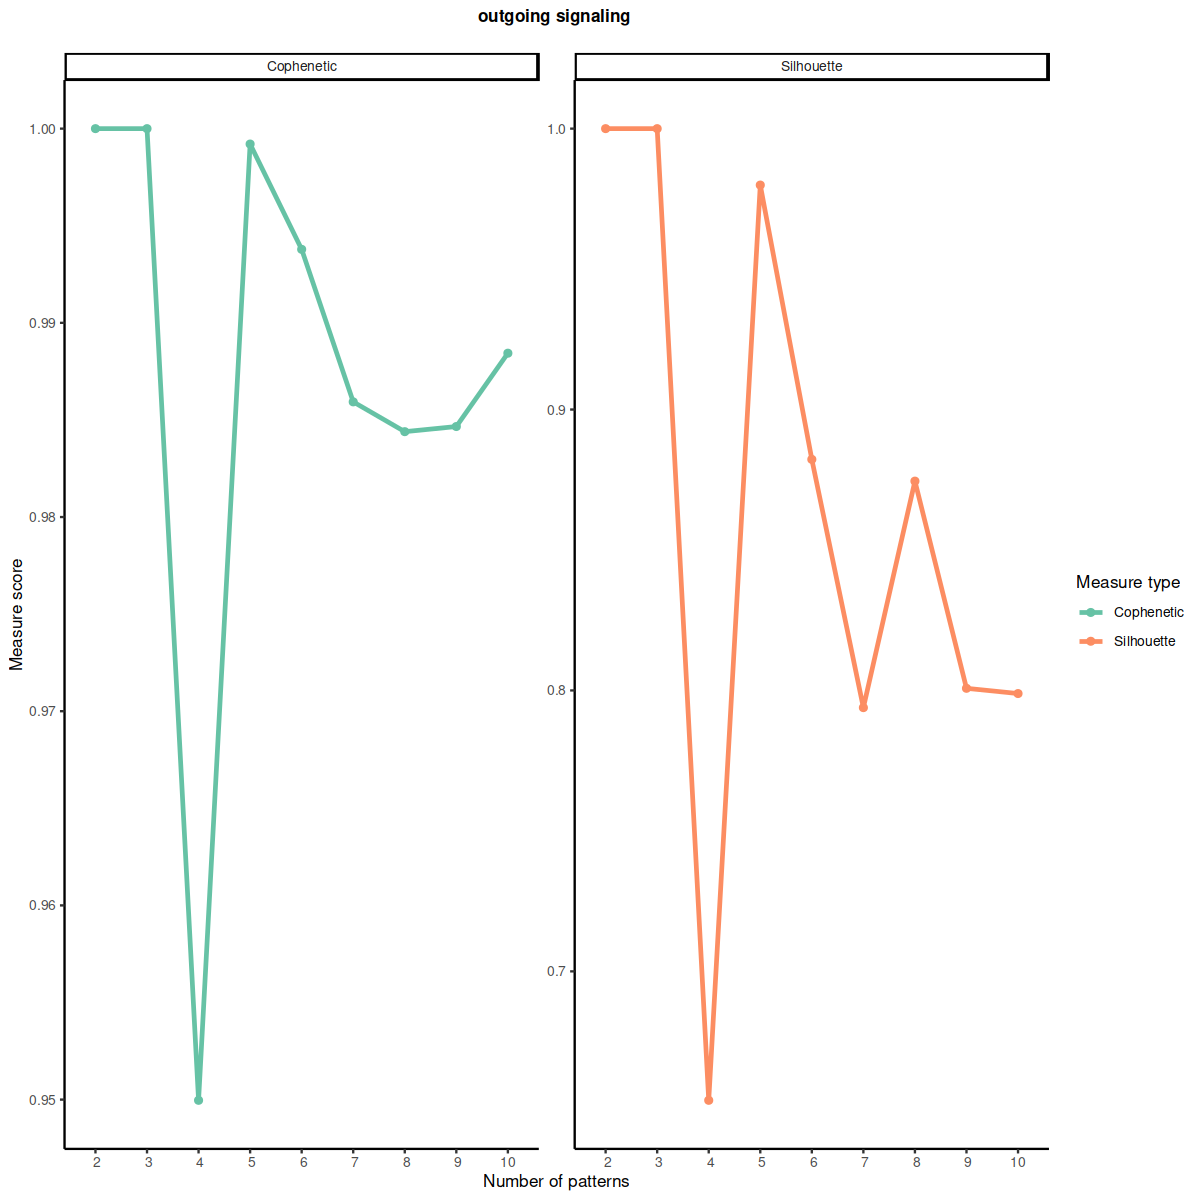

In [21]:
selectK(cellchat, pattern="outgoing")

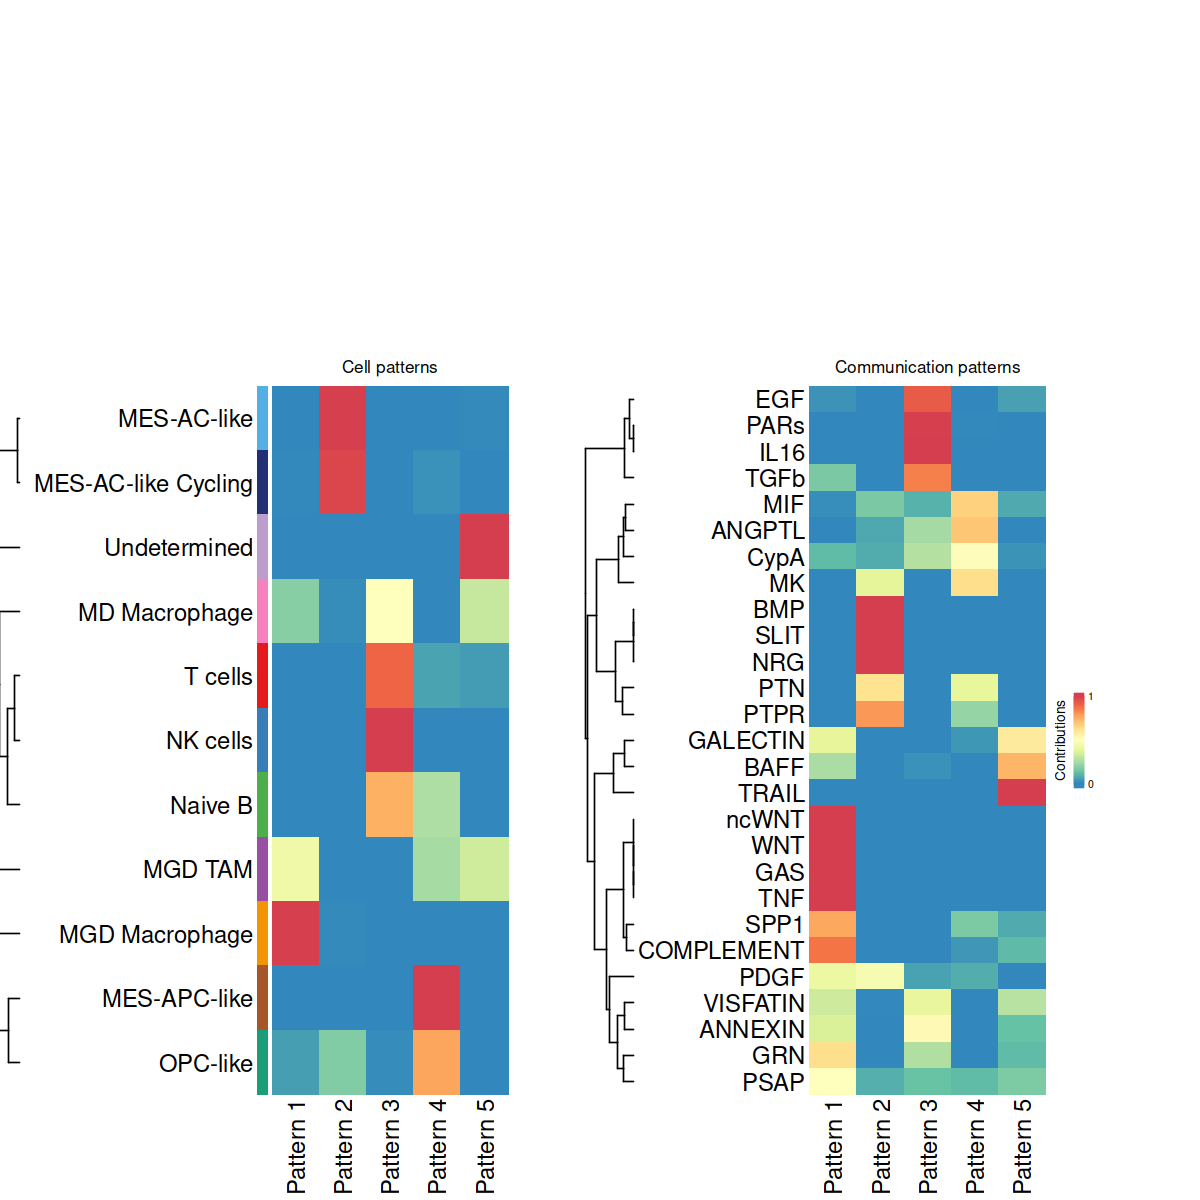

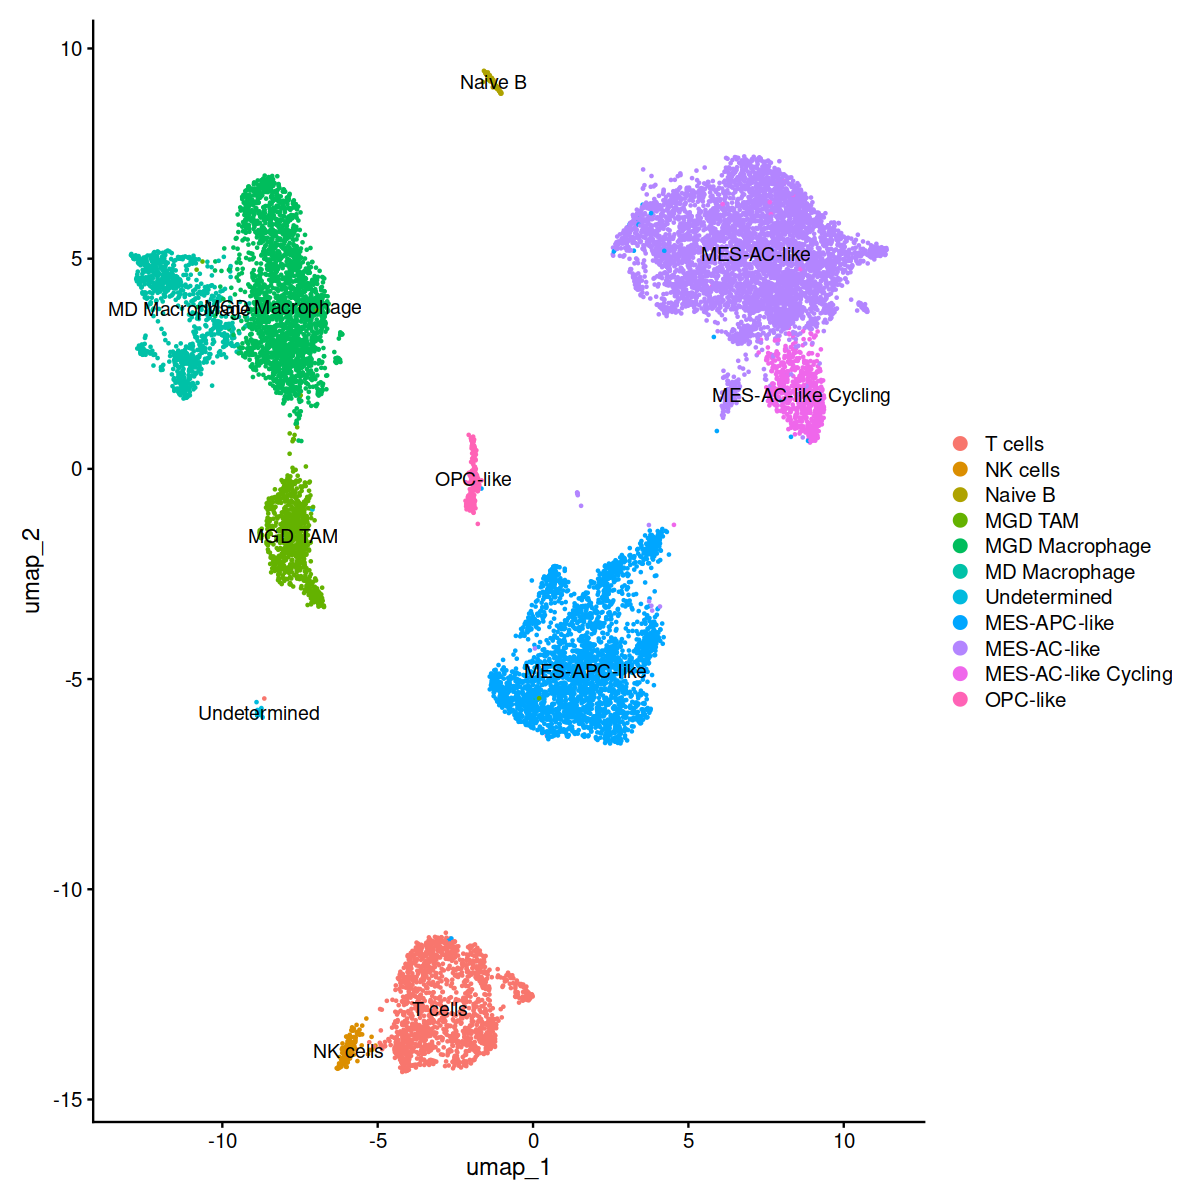

In [22]:
options(repr.plot.height=10, repr.plot.wight=15)
seurat_obj <- SetIdent(seurat_obj, value = "cell_label")
nPatterns <- 5
cellchat <- identifyCommunicationPatterns(cellchat, width=5, height=15, font.size=14, pattern="outgoing", k=nPatterns)
DimPlot(seurat_obj, label=TRUE)

Please make sure you have load `library(ggalluvial)` when running this function



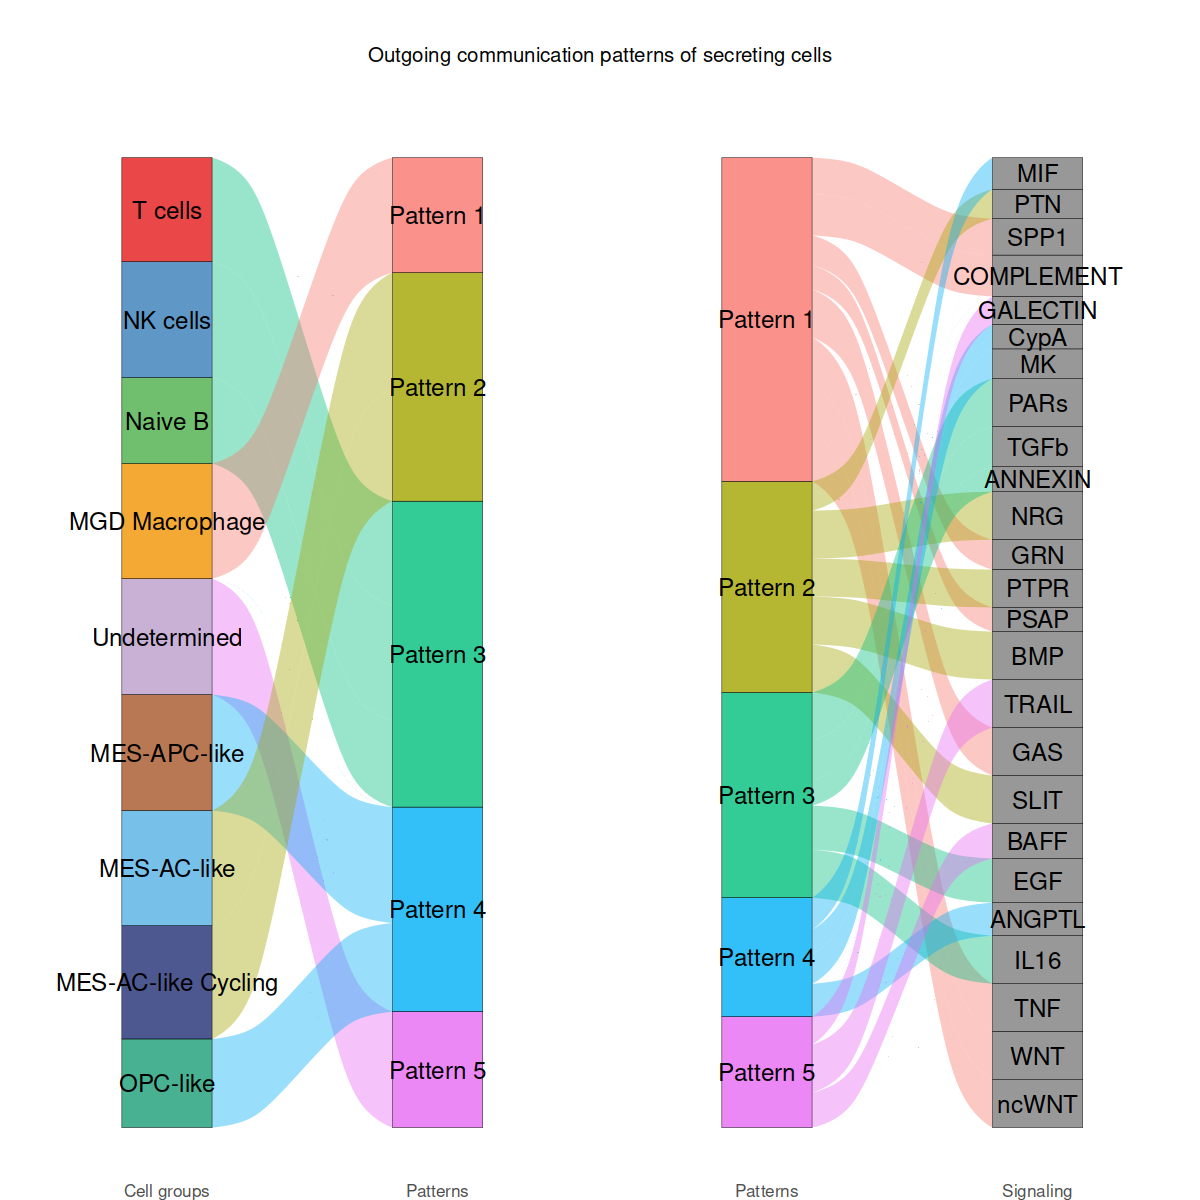

In [23]:
netAnalysis_river(cellchat, pattern="outgoing", font.size=5)

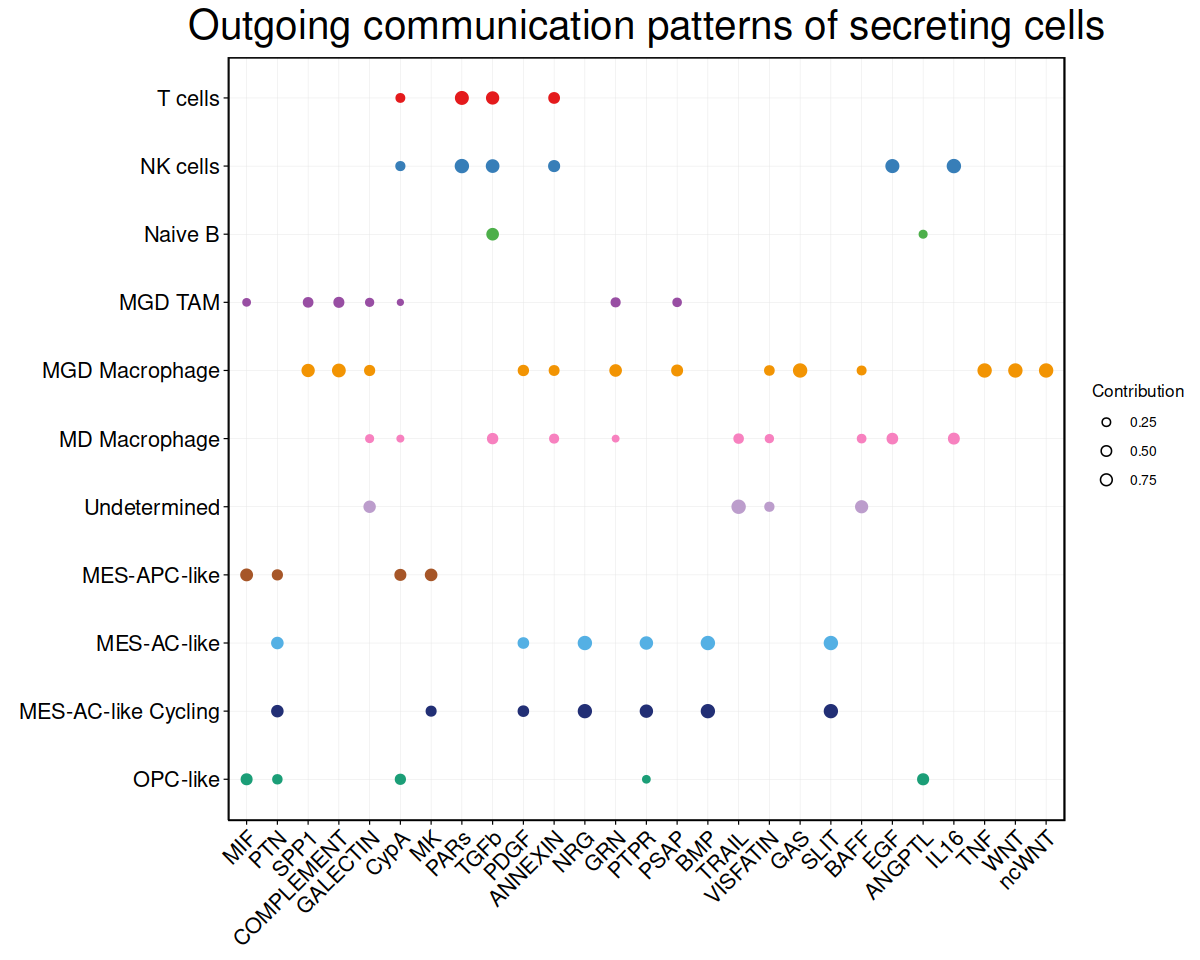

In [24]:
options(repr.plot.height=8, repr.plot.wight=4)

p <- netAnalysis_dot(cellchat, 
                font.size = 16, 
                 font.size.title = 24, 
                pattern="outgoing")

ggsave("./out/outgoing_dotplot.png", p, dpi=600, width=10, height=4)

p

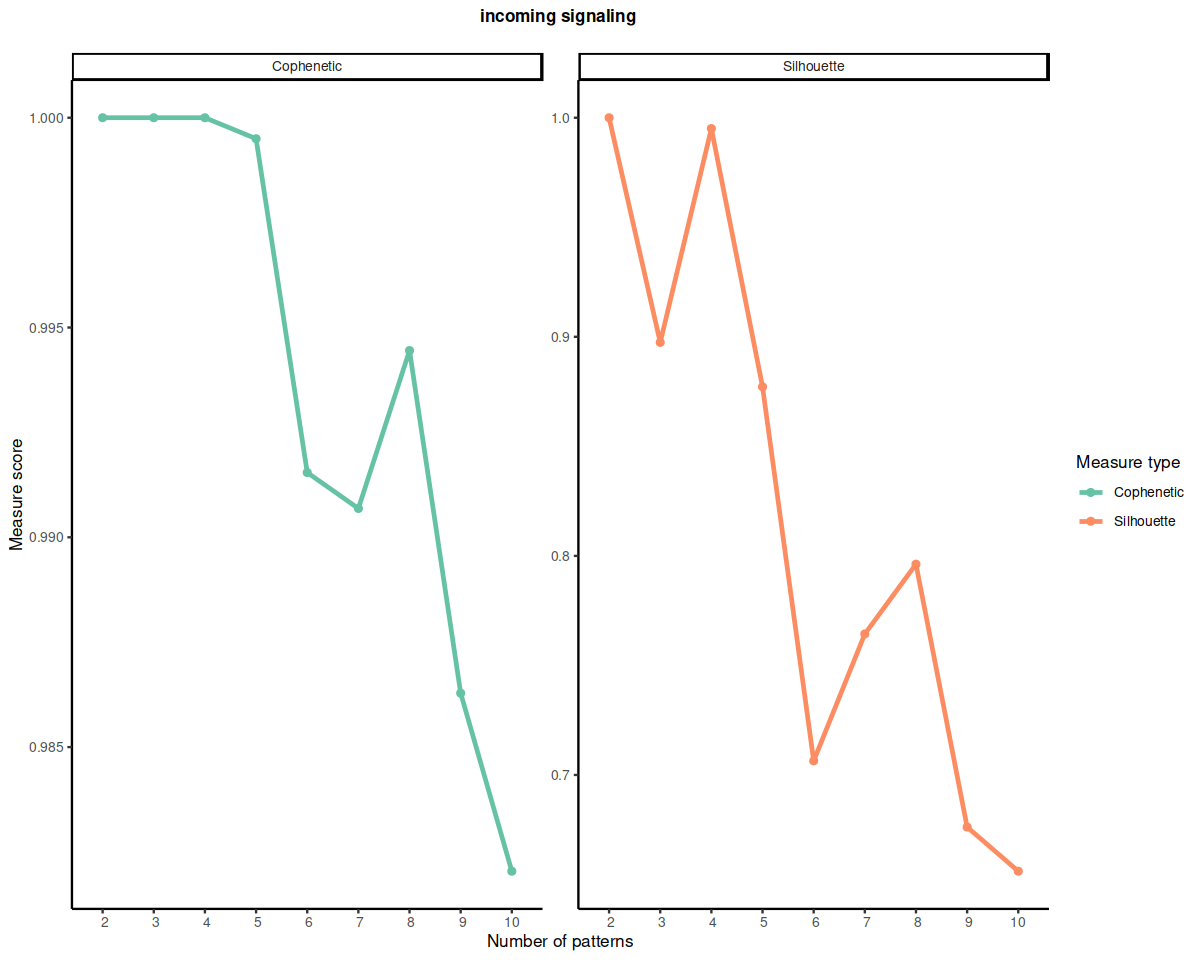

In [25]:
selectK(cellchat, pattern="incoming")

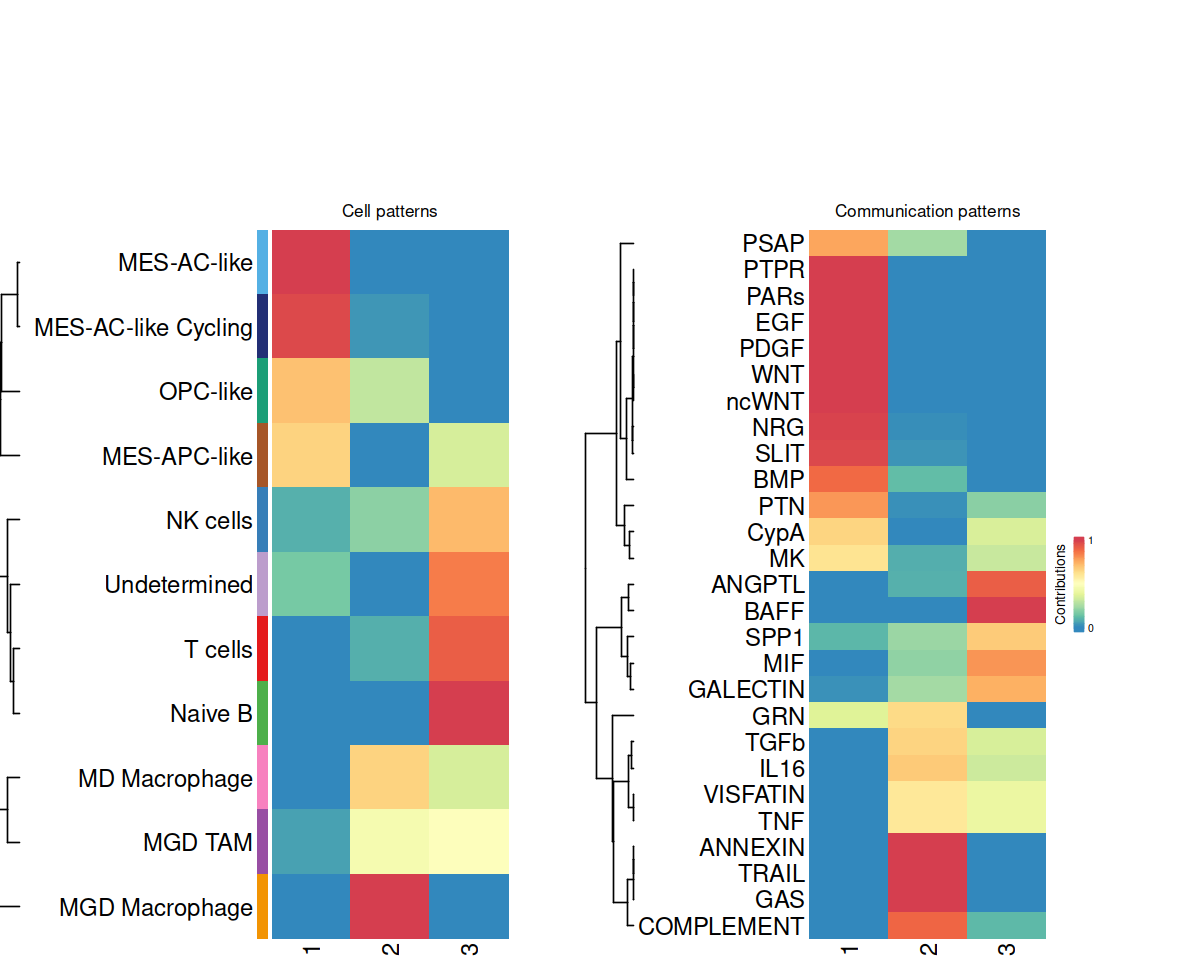

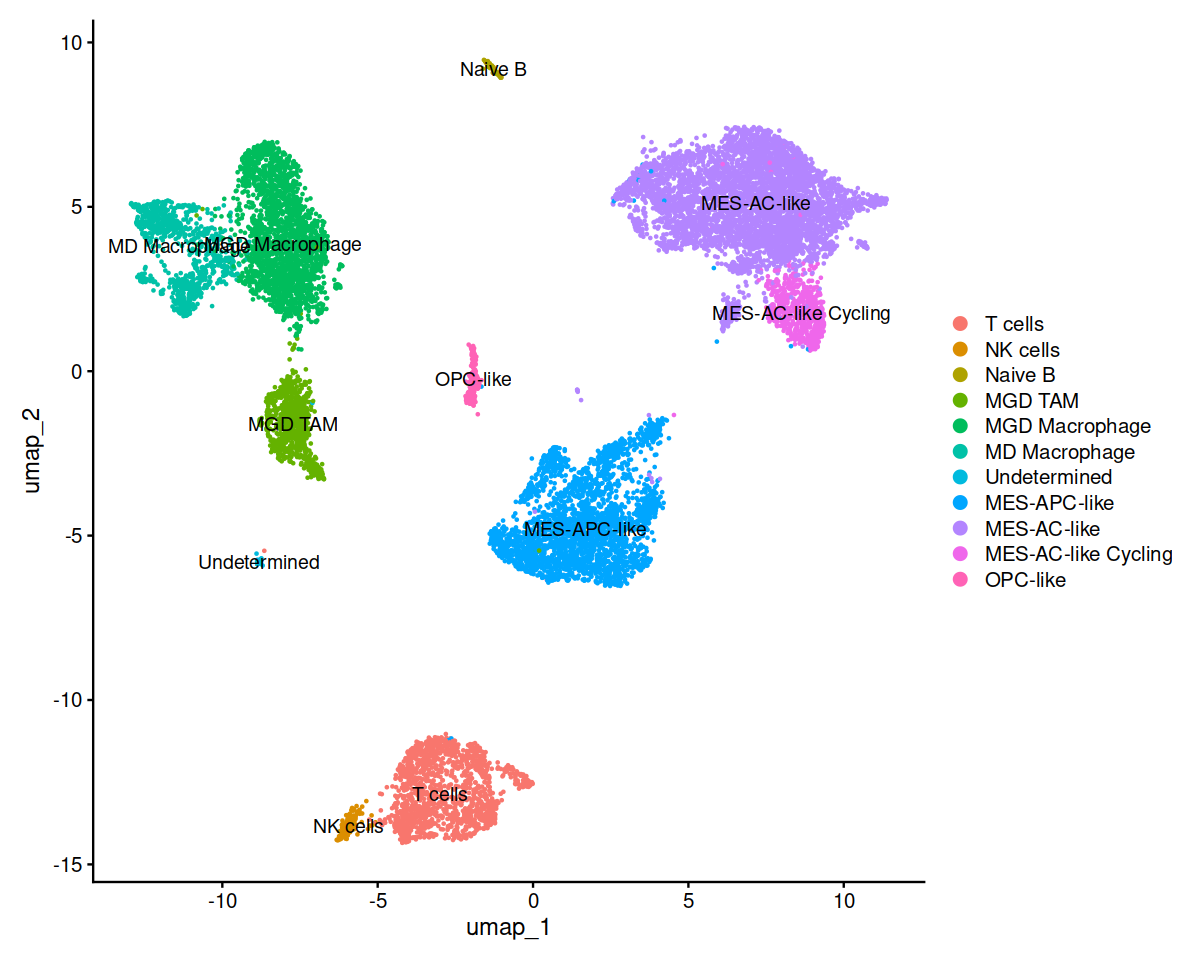

In [26]:
options(repr.plot.height=8, repr.plot.wight=5)
nPatterns <- 3
cellchat <- identifyCommunicationPatterns(cellchat, width=5, height=15, font.size=14, pattern="incoming", k=nPatterns)
DimPlot(seurat_obj, label=TRUE)

Please make sure you have load `library(ggalluvial)` when running this function



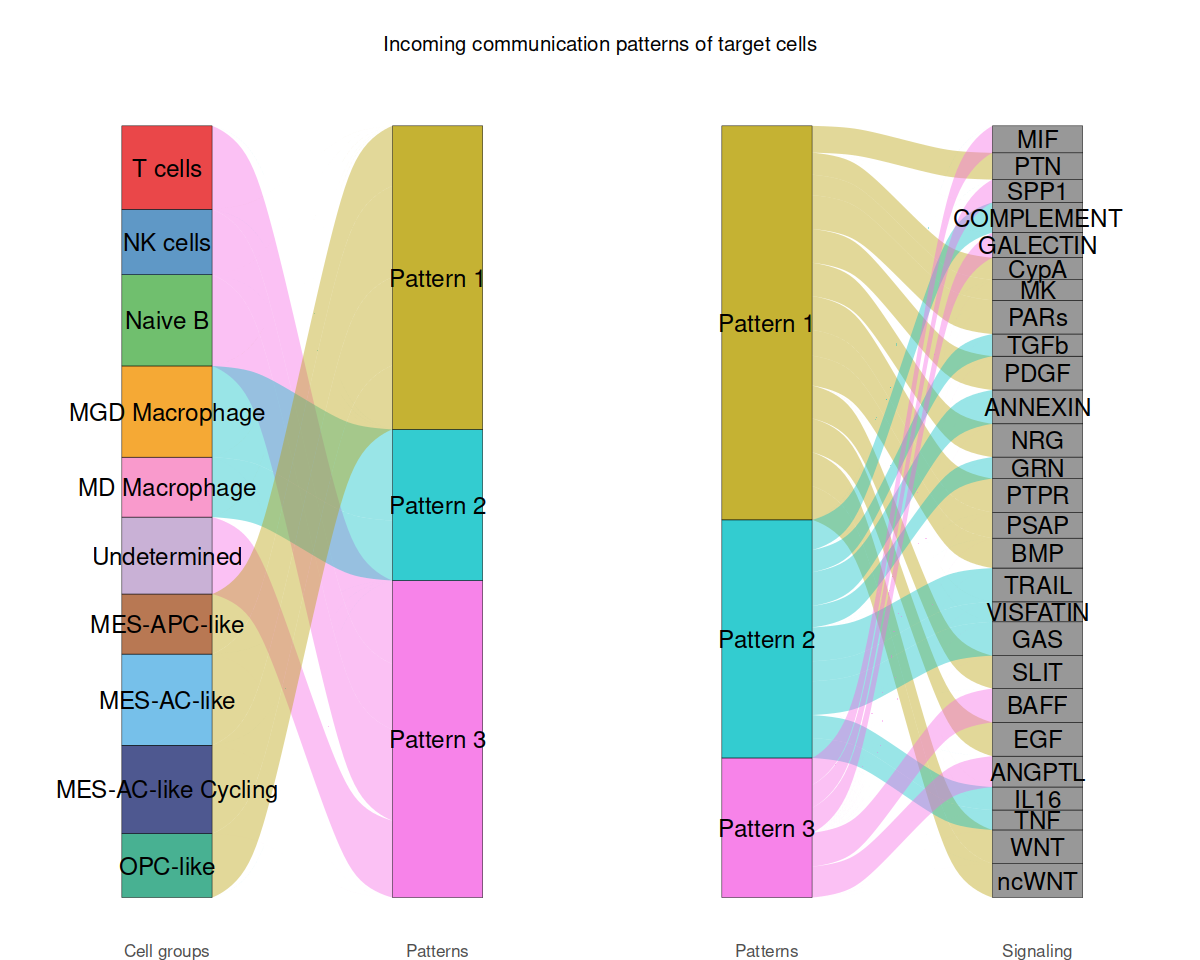

In [27]:
options(repr.plot.height=8, repr.plot.wight=5)
netAnalysis_river(cellchat, pattern="incoming", font.size=5)

In [ ]:
qsave(cellchat, "./out/cellchat.qs")

In [4]:
cellchat <- qread("./out/cellchat.qs")

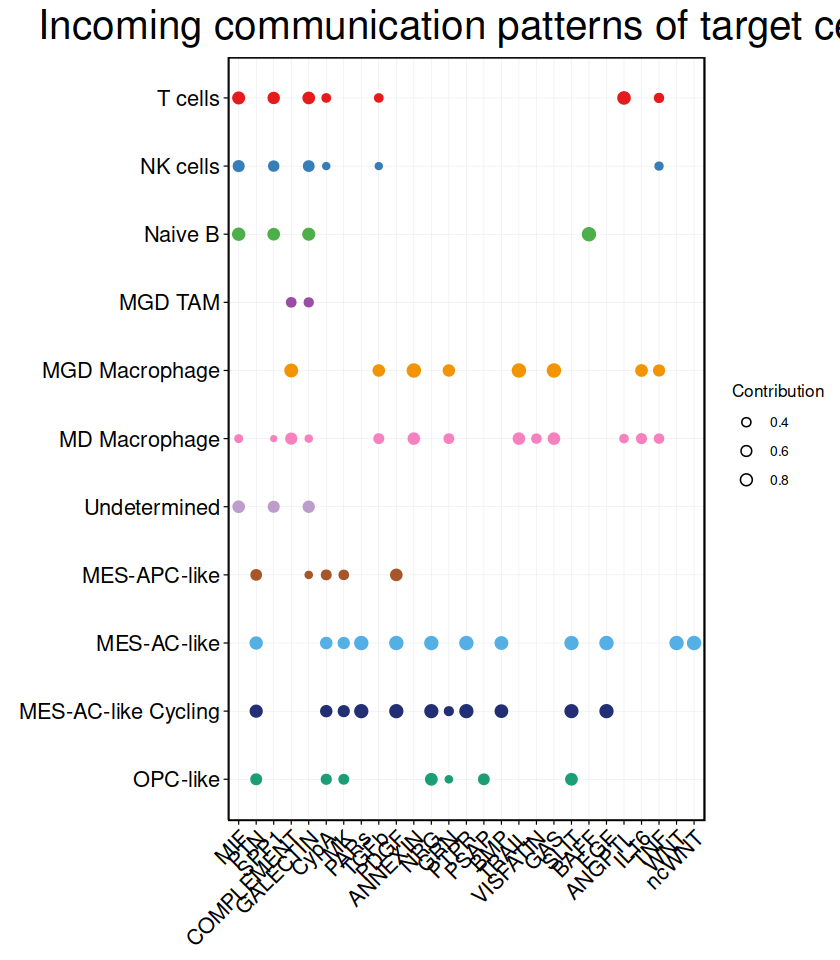

In [5]:
options(repr.plot.height=8, repr.plot.wight=10)

p <- netAnalysis_dot(cellchat, 
                font.size = 16, 
                 font.size.title = 24, 
                pattern="incoming")

ggsave("./out/incoming_dotplot.png", p, dpi=600, width=10, height=4)

p

Comparing communications on a single object 




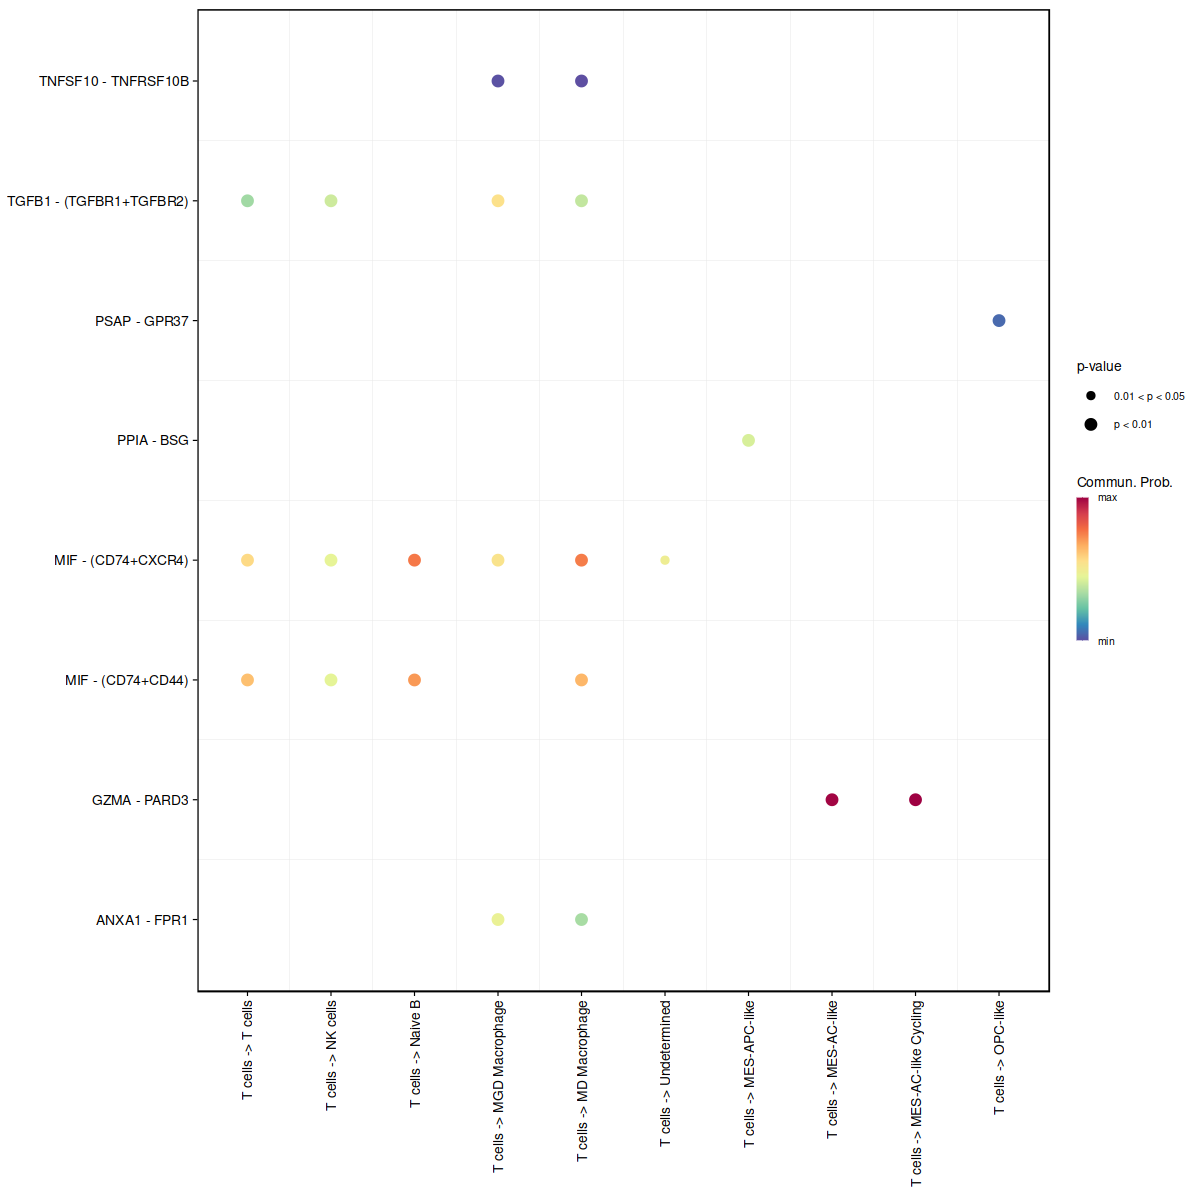

In [30]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=1, targets.use=c(1:12), remove.isolate=TRUE)

Comparing communications on a single object 




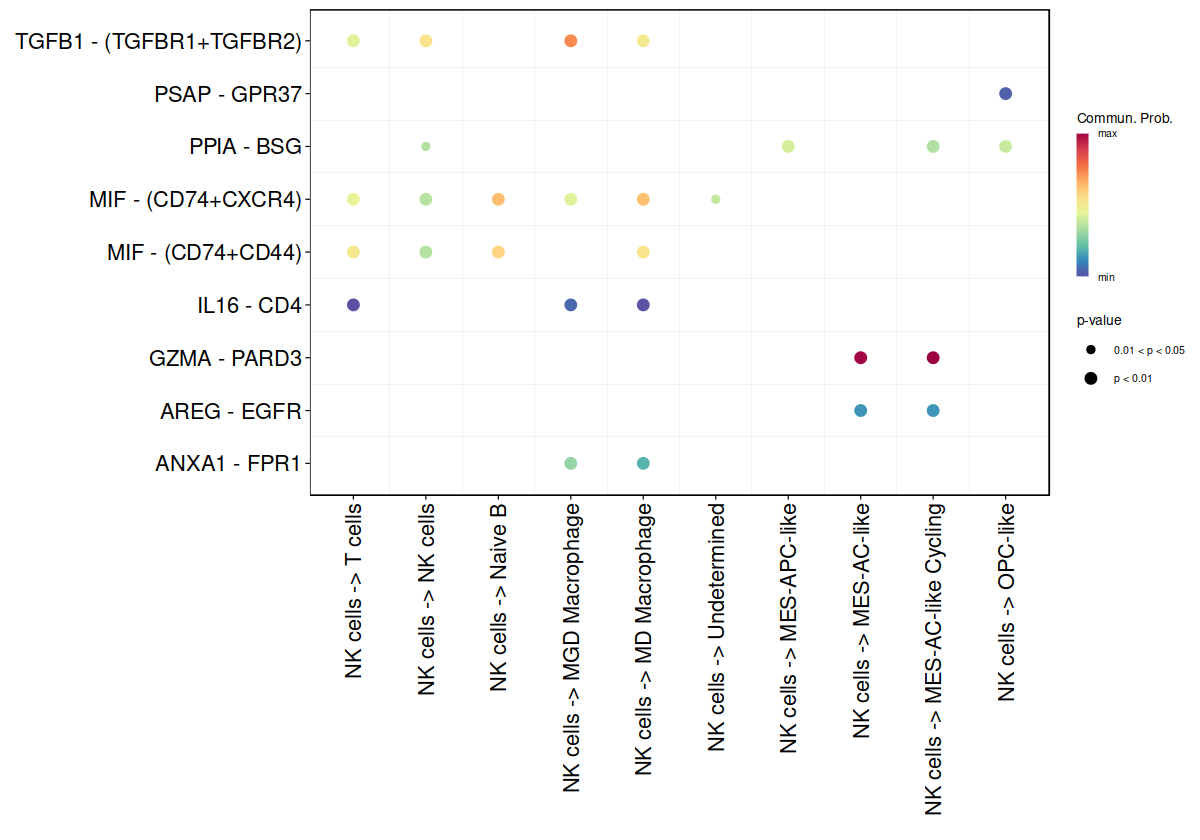

In [31]:
options(repr.plot.height=7, repr.plot.wight=7)

p <- netVisual_bubble(cellchat, 
                 font.size = 16, 
                 font.size.title = 24, 
                 sources.use=2, 
                 targets.use=c(1:16), 
                 sort.by.target = TRUE,
                 remove.isolate=TRUE,
                angle.x = 90)


p

Comparing communications on a single object 




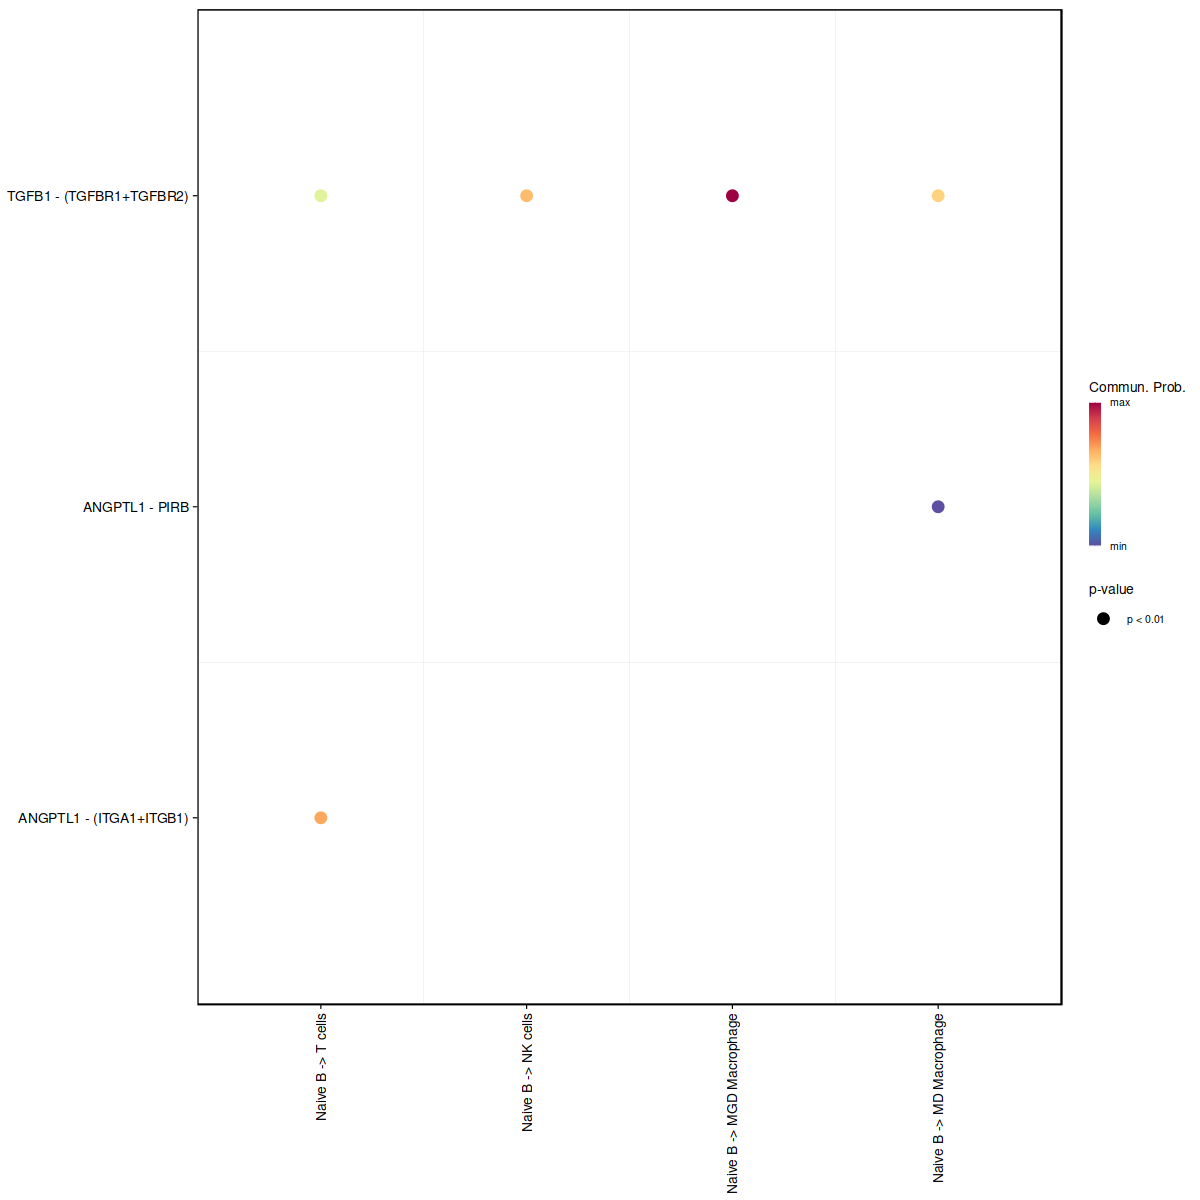

In [32]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=3, targets.use=c(1:18), remove.isolate=TRUE)

Comparing communications on a single object 




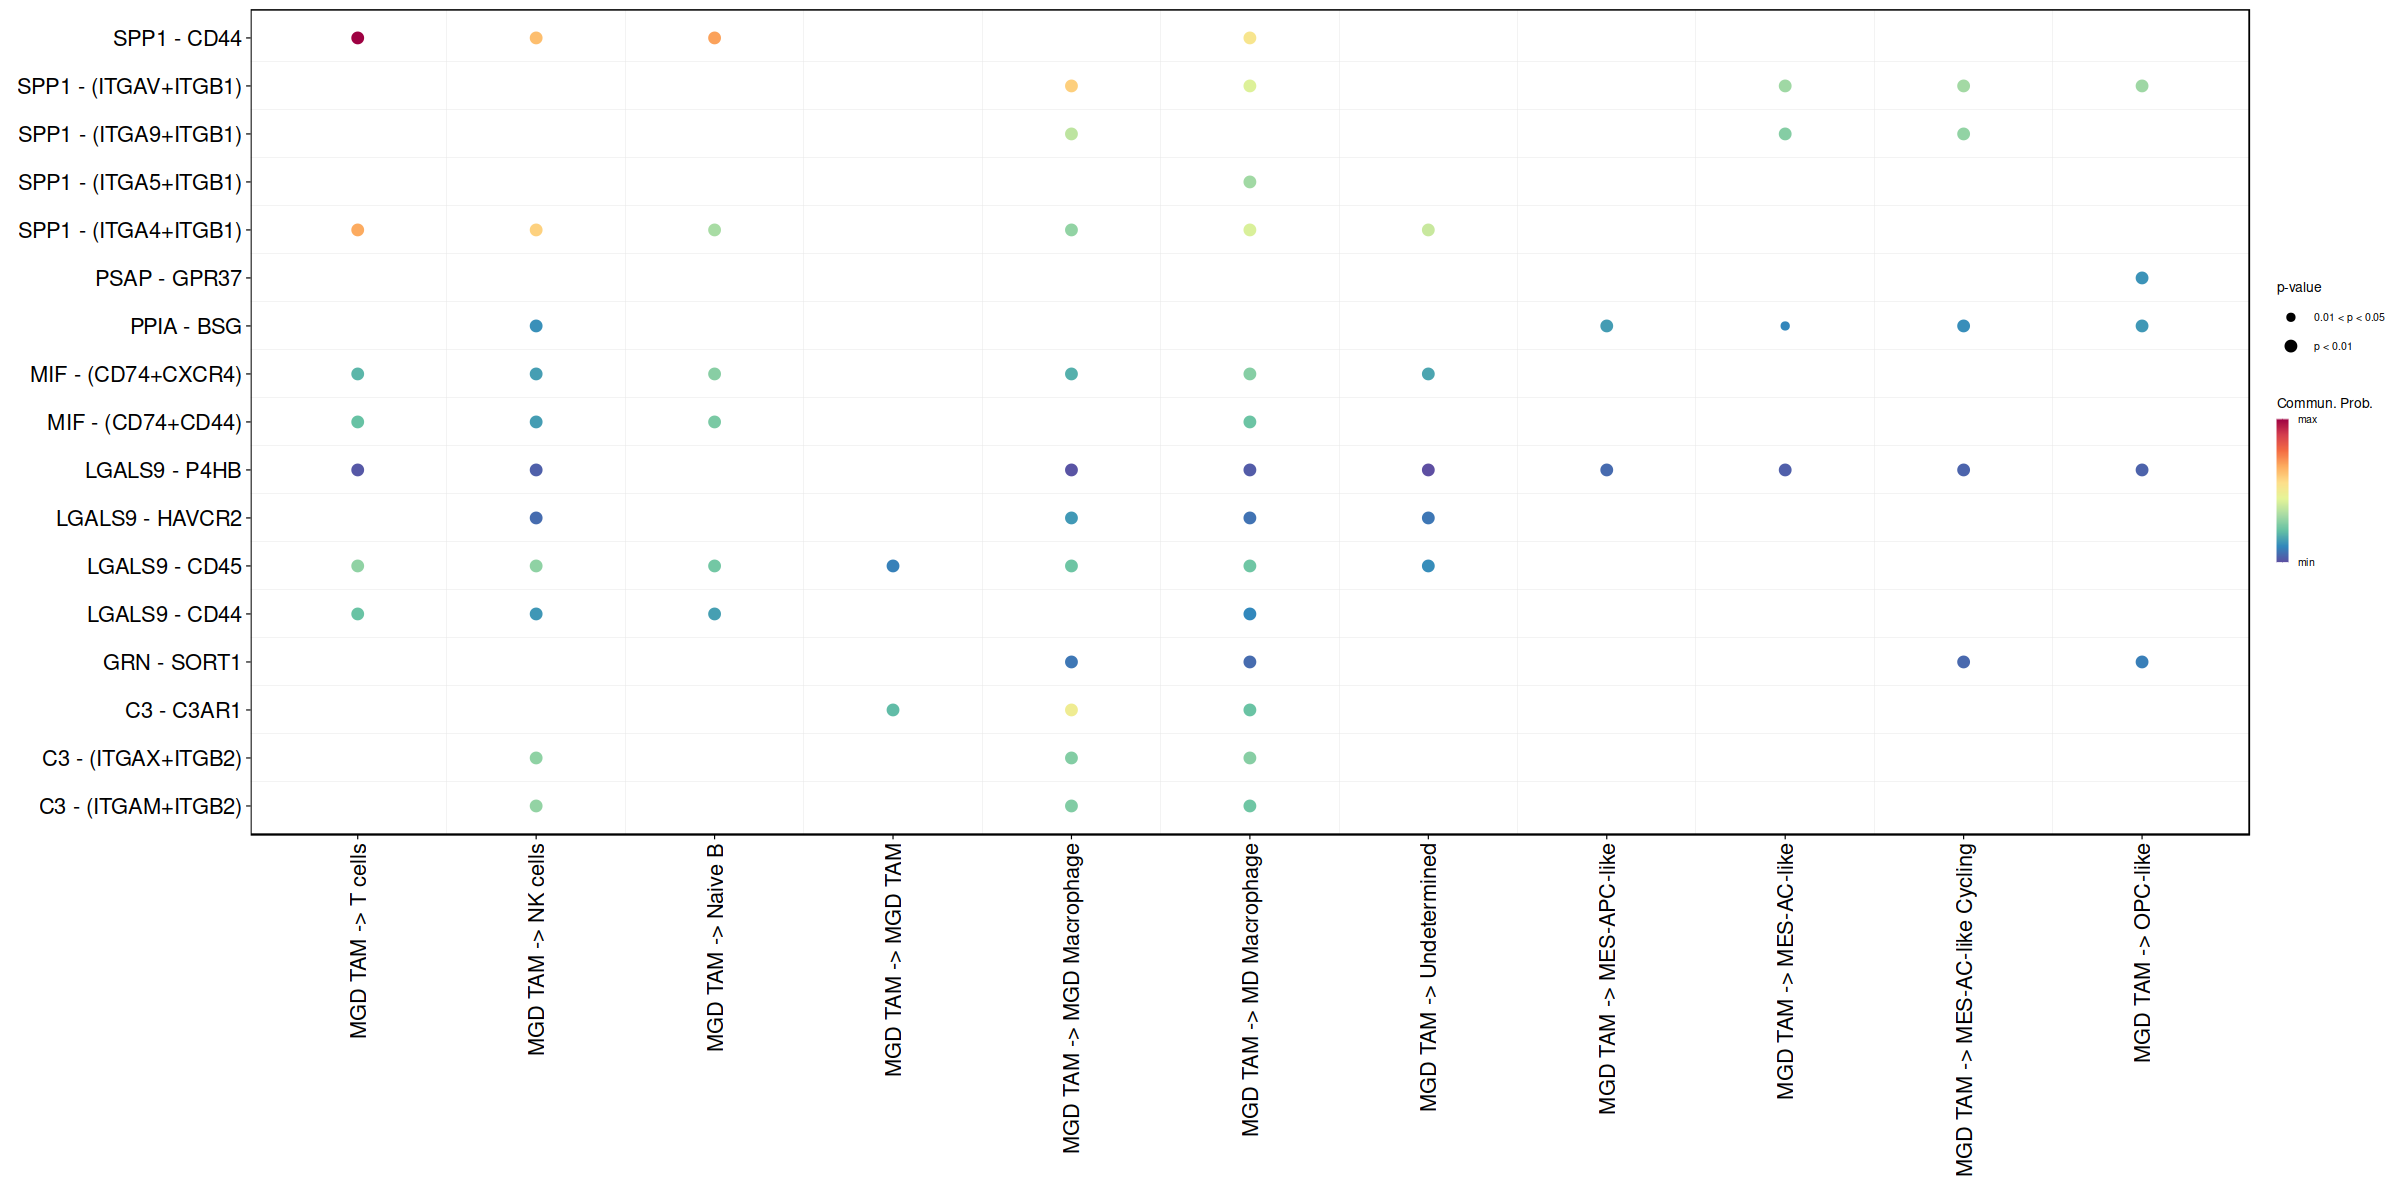

In [47]:
options(repr.plot.height=10, repr.plot.wight=20)

p <- netVisual_bubble(cellchat, 
                 font.size = 16, 
                 font.size.title = 24, 
                 sources.use=4, 
                 targets.use=c(1:16), 
                 sort.by.target = TRUE,
                 remove.isolate=TRUE,
                angle.x = 90)

ggsave("./out/MGD_polarized_outgoing.png", p, dpi=600, width=7, height=7)
p

Comparing communications on a single object 




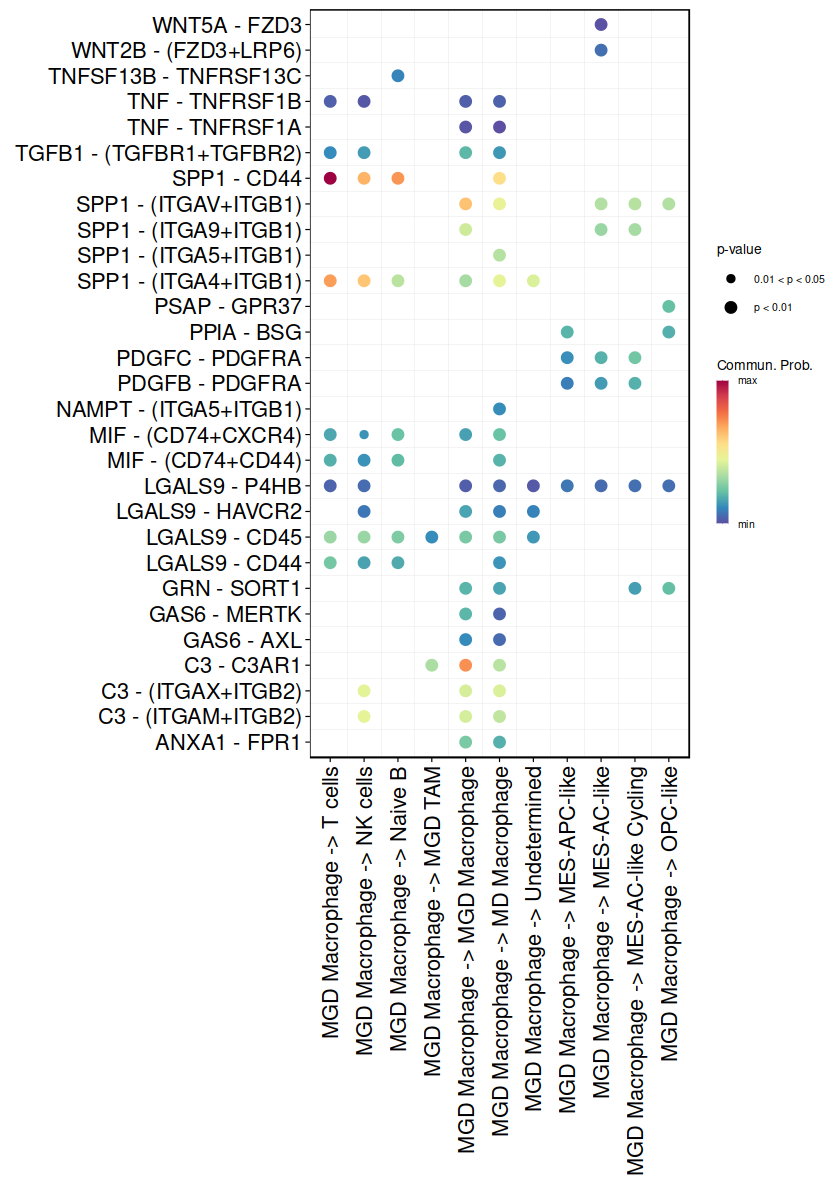

In [8]:
options(repr.plot.height=10, repr.plot.wight=20)

p <- netVisual_bubble(cellchat, 
                 font.size = 16, 
                 font.size.title = 24, 
                 sources.use=5, 
                 targets.use=c(1:16), 
                 sort.by.target = TRUE,
                 remove.isolate=TRUE,
                angle.x = 90)

ggsave("./out/MGD_Macro_outgoing.png", p, dpi=600, width=7, height=10)
p

Comparing communications on a single object 




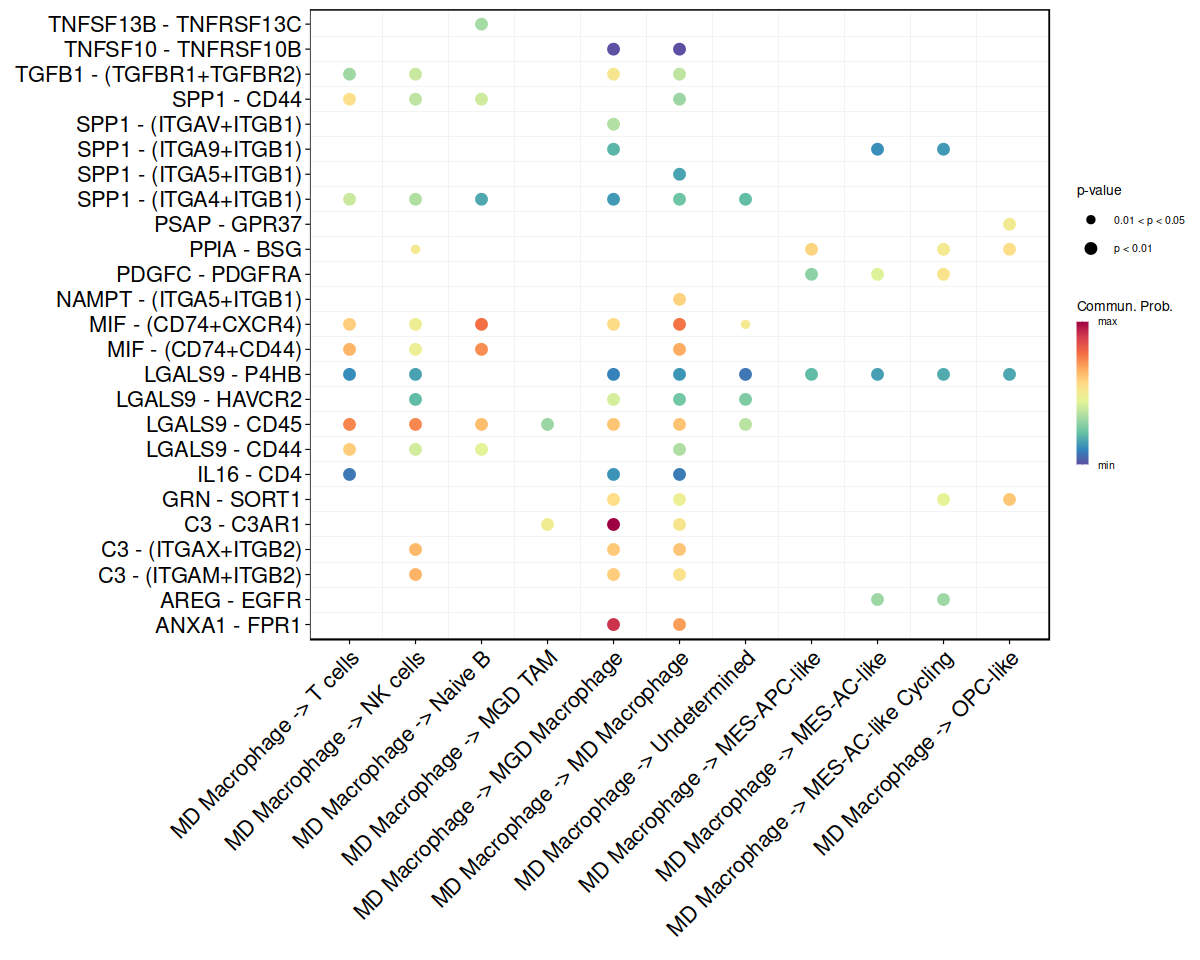

In [35]:
options(repr.plot.height=8, repr.plot.wight=4)
p <- netVisual_bubble(cellchat, 
                 font.size = 16, 
                 font.size.title = 24, 
                 sources.use=6, 
                 targets.use=c(1:16), 
                 sort.by.target = TRUE,
                 remove.isolate=TRUE,
                angle.x = 45)


p

Comparing communications on a single object 




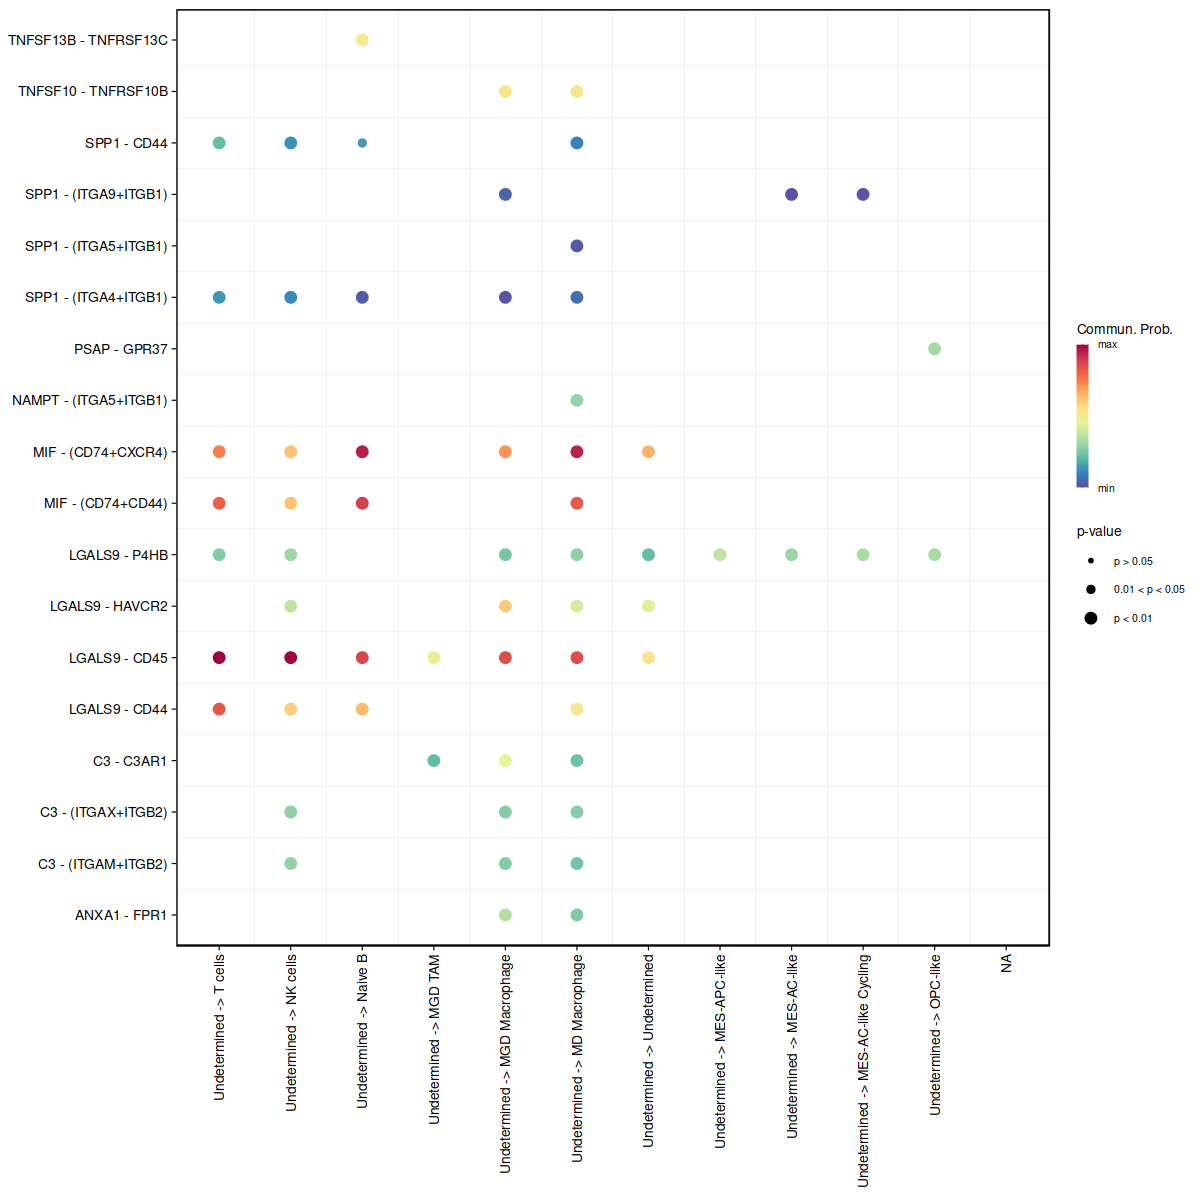

In [36]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=7, targets.use=c(1:30), remove.isolate=FALSE)

Comparing communications on a single object 




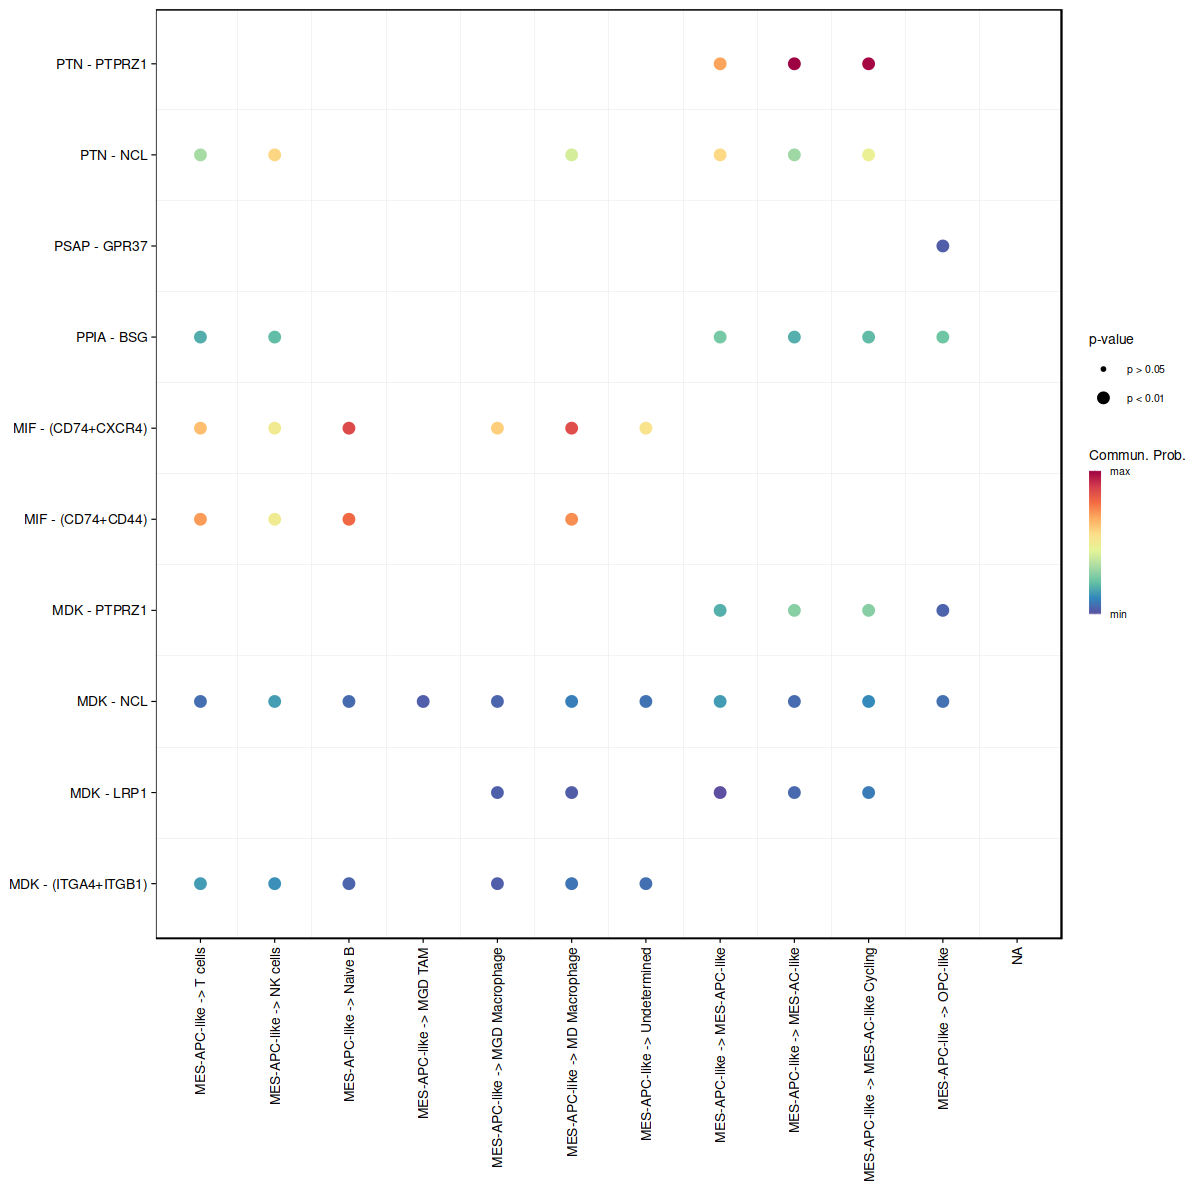

In [37]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=8, targets.use=c(1:30), remove.isolate=FALSE)

Comparing communications on a single object 




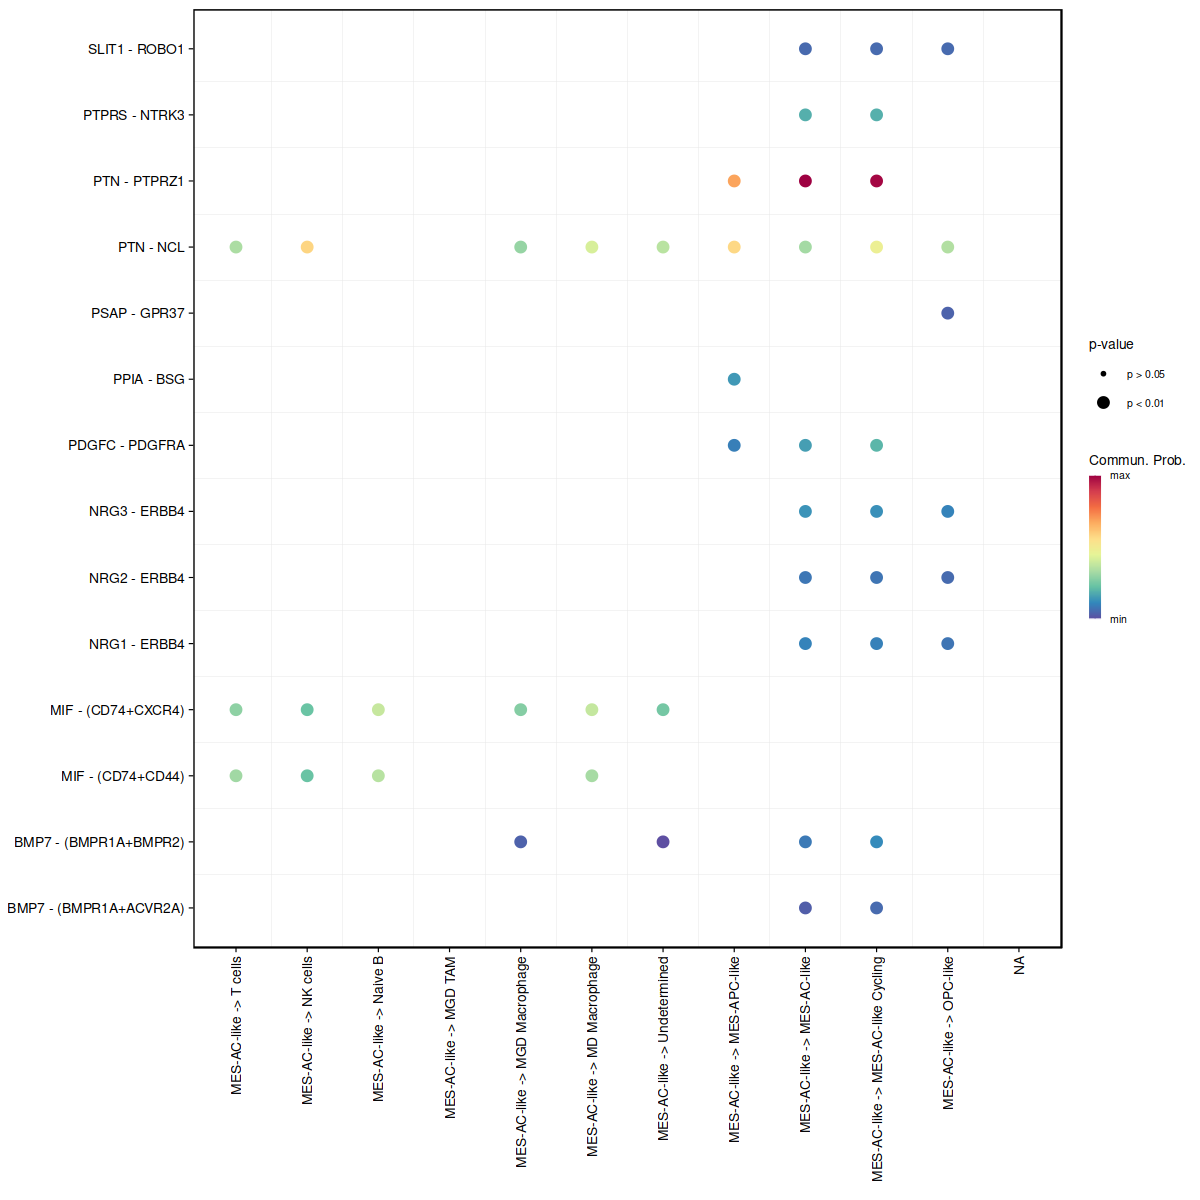

In [38]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=9, targets.use=c(1:30), remove.isolate=FALSE)

Comparing communications on a single object 




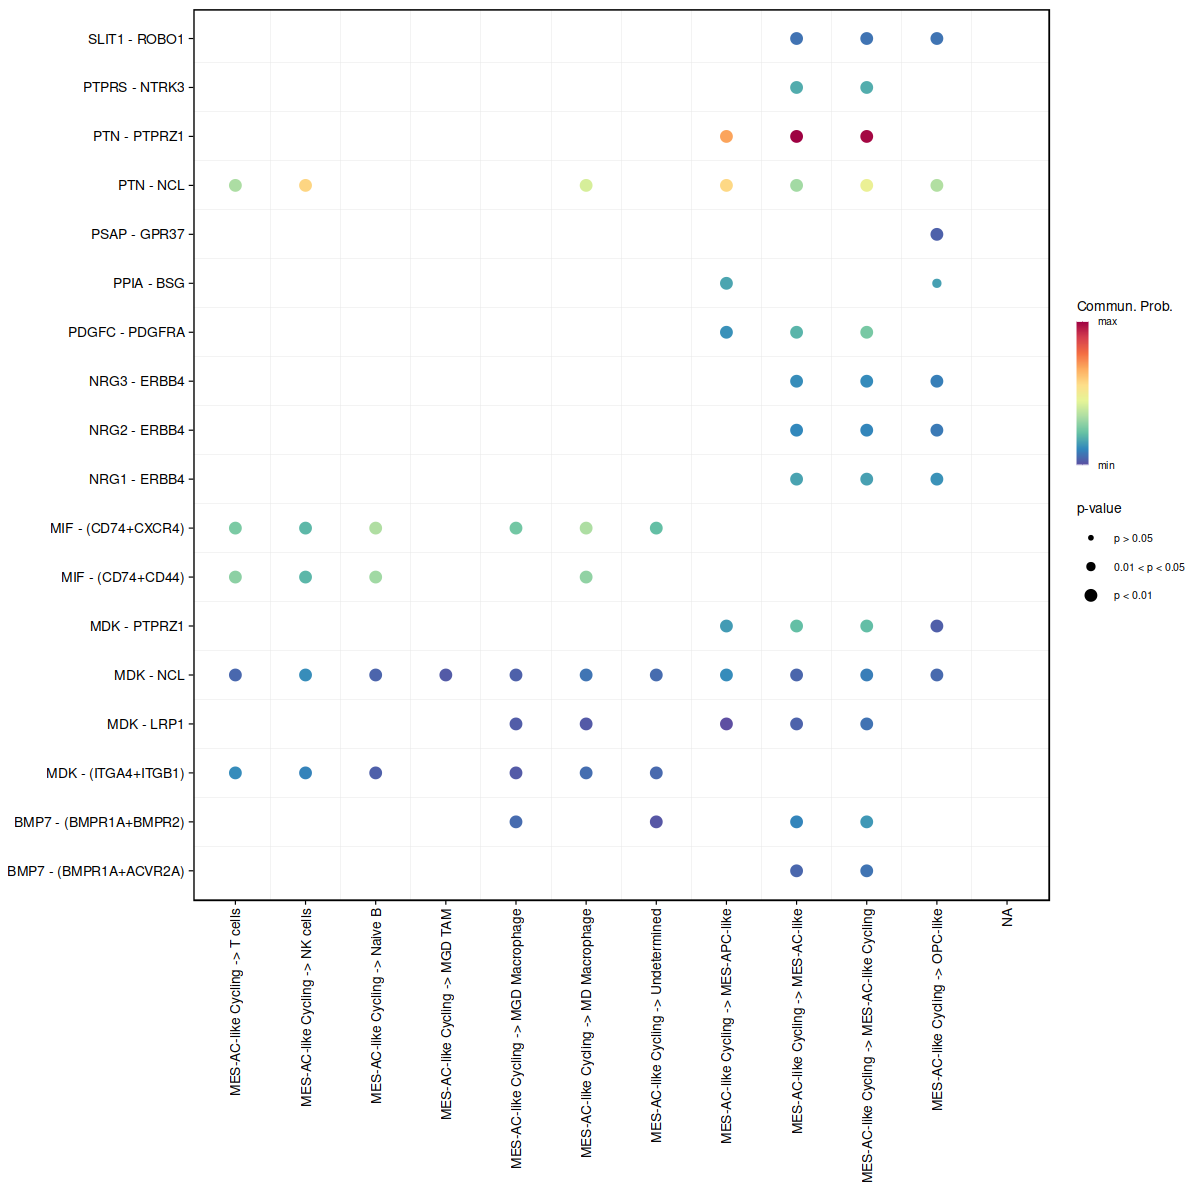

In [39]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=10, targets.use=c(1:30), remove.isolate=FALSE)

Comparing communications on a single object 




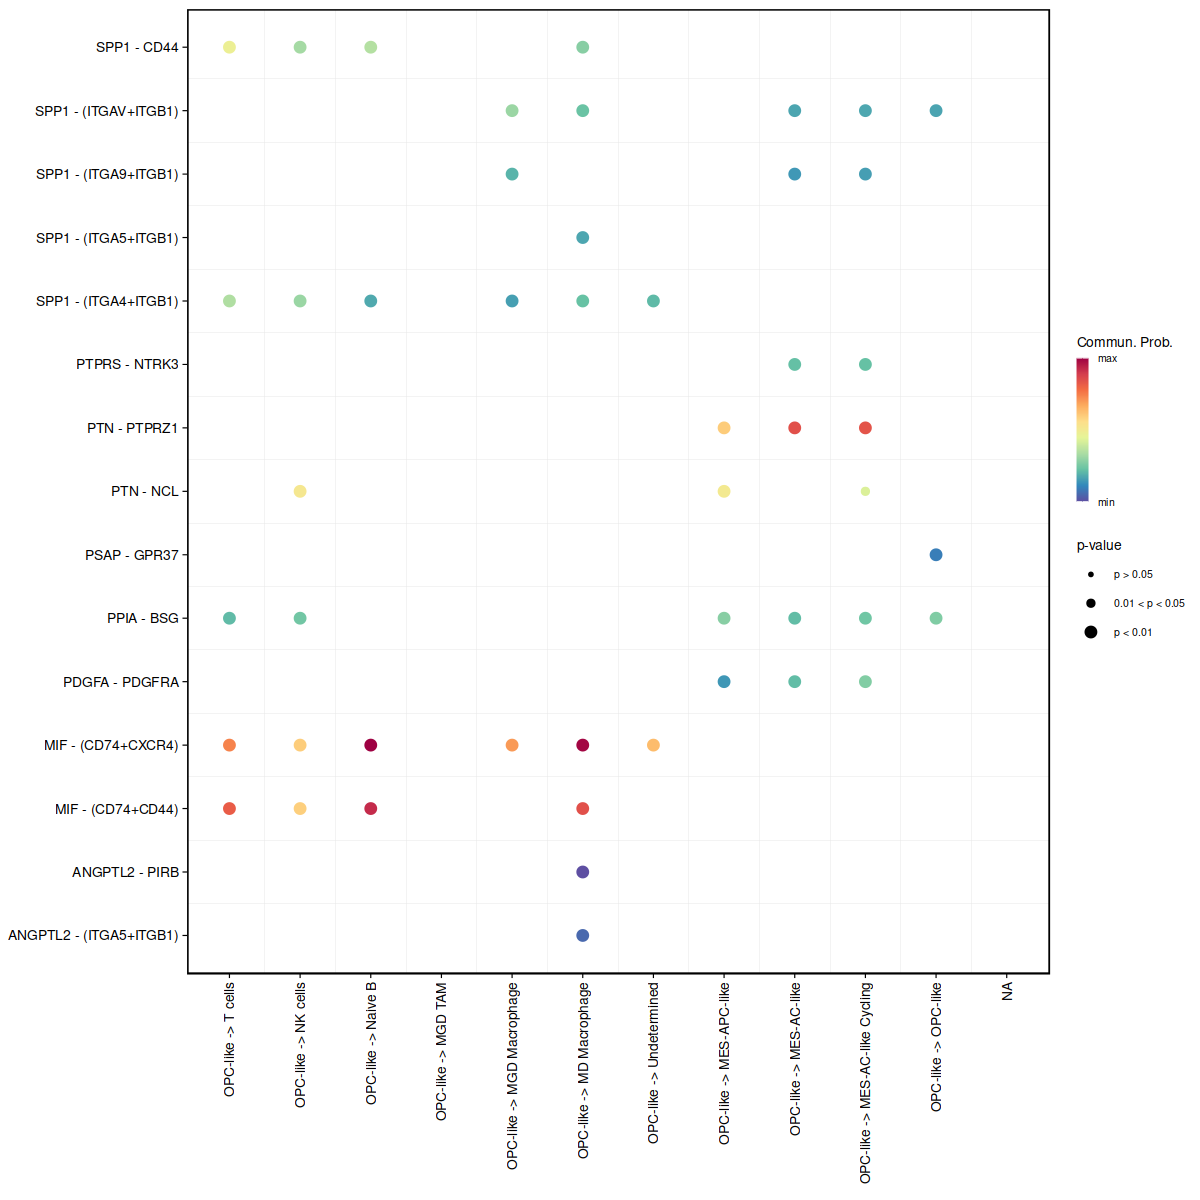

In [40]:
options(repr.plot.height=10, repr.plot.wight=20)
netVisual_bubble(cellchat, font.size=10, sources.use=11, targets.use=c(1:30), remove.isolate=FALSE)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

pathways.show <- c('SPP1')

pdf(file ="./out/SPP1_cellchat_netVisual_aggregate.pdf", width = 8, height =8)
netVisual_aggregate(cellchat, signaling = pathways.show, font.size = 16, font.size.title = 30, layout = "chord")
dev.off()

pdf(file ="./out/SPP1_cellchat_netVisual_heatmap.pdf", width = 8, height =8)
netVisual_heatmap(cellchat, signaling = pathways.show, font.size = 16, font.size.title = 24, color.heatmap = "Reds")
dev.off()

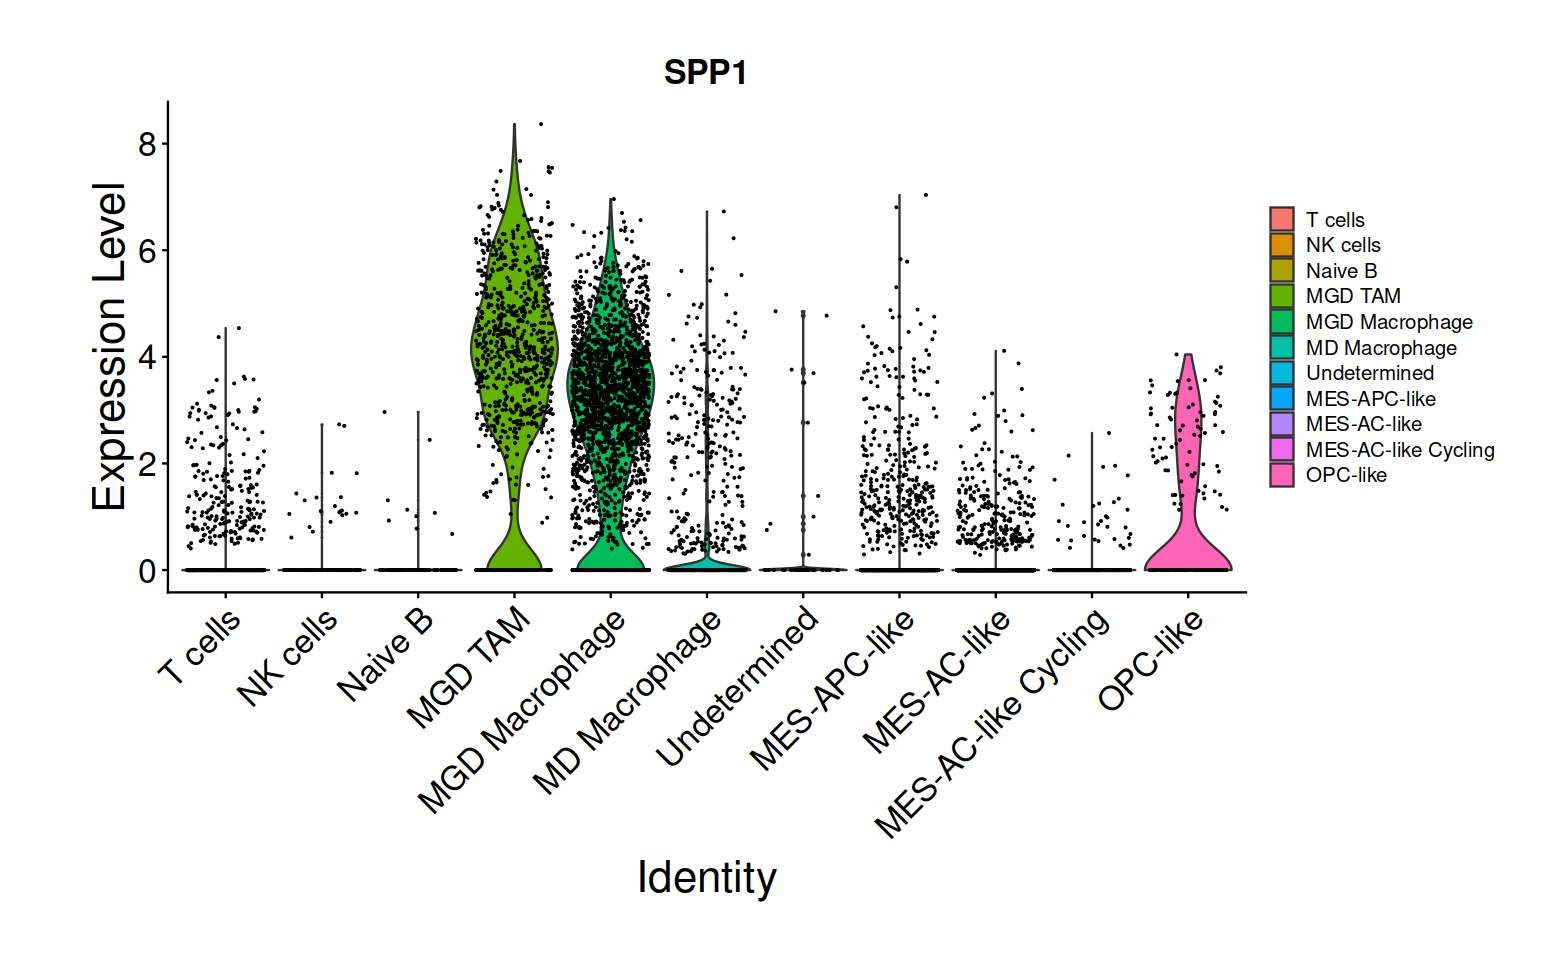

In [43]:
options(repr.plot.width=13, repr.plot.height=8)
p <- VlnPlot(seurat_obj, features = "SPP1")
p <- p + theme(
  plot.title = element_text(size = 20, face = "bold"),
  axis.title.x = element_text(size = 26),
  axis.title.y = element_text(size = 26),
  axis.text.x = element_text(size = 20),
  axis.text.y = element_text(size = 20),
  plot.margin = margin(t = 30, r = 30, b = 30, l = 50)
)
ggsave("./out/SPP1_violin.png", p, dpi=600, width=13, height=8)
p

Picking joint bandwidth of 0.112



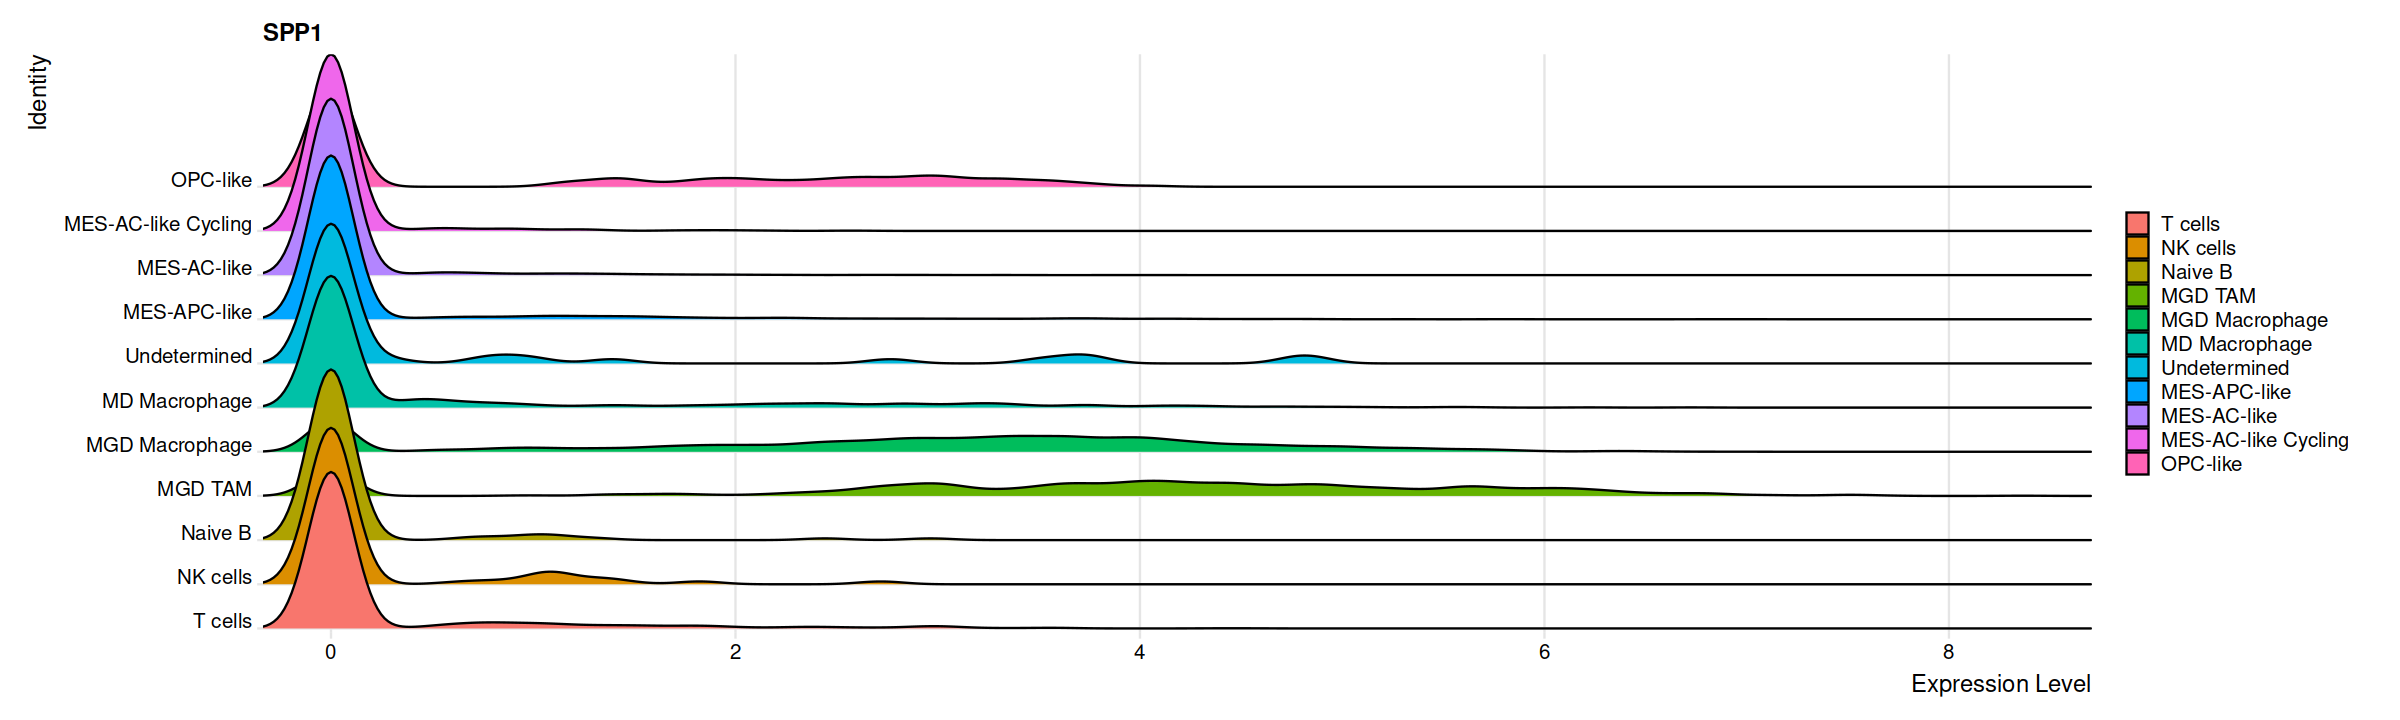

In [44]:
options(repr.plot.width=20, repr.plot.height=6)
RidgePlot(seurat_obj, features = "SPP1", ncol = 1)

In [45]:
qsave(cellchat, "./out/cellchat.qs")